# Imports y Preparacion del dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import sklearn.preprocessing as skp
import scipy.stats as stats
import scipy as sc
from sklearn.feature_extraction import FeatureHasher
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.linear_model import LinearRegression
# multivariado   
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neighbors import DistanceMetric

from sklearn import metrics



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/hotels_train.csv') 
df_test = pd.read_csv('/content/drive/MyDrive/Datasets/hotels_test.csv') 
#f = pd.read_csv("/content/hotels_train.csv")
df_original = df.copy()

# a) Exploracion Inicial

Realizamos un analisis del dataset

In [5]:
df.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,NaN,0,Transient,115.5,0,1,Canceled,2016-08-25,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,NaN,0,Transient,42.0,1,0,Check-Out,2015-11-01,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,NaN,0,Transient,229.0,0,2,Check-Out,2016-10-14,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,NaN,0,Transient,75.0,0,0,Canceled,2016-11-29,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,NaN,0,Transient-Party,75.0,0,1,Check-Out,2017-03-26,28c75445-c603-413a-babf-ad377018b592,0


In [6]:
print("La cant de filas del dataset es: ", df.shape[0])
print("La cant de columnas del dataset es: ", df.shape[1])

La cant de filas del dataset es:  61913
La cant de columnas del dataset es:  33


In [7]:
list(df.columns)

['hotel',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date',
 'id',
 'is_canceled']

Vemos poco descriptiva la variable adr, por lo que le cambiamos el nombre

In [8]:
columnas = {"adr": "average_daily_rate", "arrival_date_year":"year", "arrival_date_month":"month", "arrival_date_day_of_month":"day"} #cambiar nombres a las categorias
df.rename(columns = columnas, inplace = True)
df.head(3)

,hotel,lead_time,year,month,arrival_date_week_number,day,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,company,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,NaN,0,Transient,115.5,0,1,Canceled,2016-08-25,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,NaN,0,Transient,42.0,1,0,Check-Out,2015-11-01,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,NaN,0,Transient,229.0,0,2,Check-Out,2016-10-14,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0


## ● Tipo de variable

In [9]:
df.dtypes

hotel                              object
lead_time                           int64
year                                int64
month                              object
arrival_date_week_number            int64
day                                 int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             float64
company                           

## ●  Variables Cuantitativas

Las variables **cuantitativas** observadas del  dataset son: 
- lead time  (soporte continuo)
- stays_in_weekend_nights (rango discreto)
- stays_in_week_nights (rango discreto)
- adults (rango discreto)
- children  (rango discreto)
- babies (rango discreto)
- previous_cancellations 
- previous_bookings_not_canceled
- booking_changes 
- days_in_waiting_list 
- average daily rate
- required_car_parking_spaces
- total_of_special_requests


In [10]:
variables_cuantitativas = ['lead_time', 'stays_in_weekend_nights','stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled','booking_changes', 'days_in_waiting_list','average_daily_rate','required_car_parking_spaces','total_of_special_requests']
df[variables_cuantitativas].describe()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,average_daily_rate,required_car_parking_spaces,total_of_special_requests
count,61913.000000,61913.000000,61913.000000,61913.000000,61909.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000
mean,112.248187,0.924135,2.510054,1.862791,0.104896,0.007155,0.114790,0.115420,0.195952,2.638977,102.383773,0.049957,0.523703
std,110.717953,0.993101,1.884926,0.589066,0.402847,0.092158,0.993723,1.396359,0.610519,18.619092,47.757640,0.221023,0.775412
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,23.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,78.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,172.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,629.000000,16.000000,40.000000,55.000000,10.000000,9.000000,26.000000,70.000000,17.000000,391.000000,510.000000,8.000000,5.000000


## ●  Variables Cualitativas

Las variables **cualitativas** observadas del dataset son:
-  hotel
- meal 
- country
- market_segment 
- distribution_channel 
- reserved_room_type
- assigned_room_type
- deposit_type
- customer_type
- reservation_status_date 
- is_canceled
- agent


.Reportar los posibles valores que toman y cuán frecuentemente lo hacen. 


In [11]:
print('Tipos de hotel')
print(df['hotel'].value_counts())

Tipos de hotel
City Hotel      42129
Resort Hotel    19784
Name: hotel, dtype: int64


In [12]:
print('Meses de llegada')
print(df['month'].value_counts())

Meses de llegada
August       7176
July         6524
May          6159
April        5878
October      5863
June         5772
September    5619
March        4899
February     4125
December     3493
November     3404
January      3001
Name: month, dtype: int64


In [13]:
print(df['country'].unique()) #Vemos los paises de llegada registrados

['USA' 'PRT' 'CHE' 'FRA' 'AGO' 'GBR' 'DEU' 'ESP' 'ROU' 'SWE' 'IRL' 'CN'
 'ITA' 'NLD' 'NOR' 'MAR' 'IND' 'BEL' 'ISR' 'KOR' 'TUN' 'JPN' 'FIN' 'TUR'
 'CHN' 'AUT' 'ZAF' 'LUX' 'BRA' 'POL' 'DNK' 'IRN' 'RUS' 'VEN' 'SEN' 'AUS'
 'MLT' 'BGR' 'THA' 'GEO' 'SRB' 'PHL' 'ARG' 'LVA' 'LTU' 'ARE' nan 'VNM'
 'MOZ' 'MEX' 'HUN' 'DZA' 'GAB' 'UKR' 'SVN' 'HRV' 'SVK' 'CHL' 'BLR' 'CPV'
 'CRI' 'EST' 'TWN' 'ALB' 'SGP' 'PRI' 'IDN' 'DOM' 'MUS' 'OMN' 'EGY' 'SAU'
 'NZL' 'FRO' 'CYP' 'PER' 'CZE' 'GRC' 'ARM' 'COL' 'PAK' 'MDG' 'HKG' 'MYS'
 'MKD' 'ISL' 'BIH' 'NGA' 'AZE' 'MAC' 'JEY' 'SUR' 'KWT' 'BGD' 'IRQ' 'MDV'
 'GGY' 'VGB' 'ECU' 'URY' 'ETH' 'LBN' 'BOL' 'QAT' 'JOR' 'COM' 'GNB' 'MYT'
 'UGA' 'BEN' 'GIB' 'KAZ' 'TZA' 'LBY' 'SYC' 'PRY' 'MNE' 'ZWE' 'CAF' 'ATA'
 'MWI' 'JAM' 'AND' 'LIE' 'FJI' 'TJK' 'LKA' 'HND' 'PAN' 'CMR' 'KNA' 'KEN'
 'UMI' 'PYF' 'GLP' 'BRB' 'CIV' 'ZMB' 'CUB' 'TGO' 'SYR' 'SDN' 'NAM' 'GHA'
 'GTM' 'BHR' 'STP' 'MCO' 'IMN' 'RWA']


In [14]:
print('Paises de origen')  
print(df['country'].value_counts().head(30)) #Veo los 30 paises de origen mas frecuentes
#print(df['country'].value_counts())

Paises de origen
PRT    27950
GBR     5733
FRA     4809
ESP     4210
DEU     3312
ITA     1911
IRL     1617
BRA     1152
BEL     1124
USA     1021
NLD      982
CHE      847
CN       597
AUT      581
CHN      545
SWE      481
POL      430
RUS      337
ISR      322
NOR      302
ROU      246
AUS      217
AGO      200
DNK      197
FIN      191
LUX      150
MAR      135
TUR      134
HUN      122
ARG      106
Name: country, dtype: int64


In [15]:
print('Tipos de comida reservada') #CAMBIAR en el paper dice: Undefined/SC – no meal package, tendriamos que corregir y ponerle al undefined SC
print(df['meal'].value_counts())

Tipos de comida reservada
BB           47837
HB            7452
SC            5556
Undefined      591
FB             477
Name: meal, dtype: int64


In [16]:
#CAMBIO EL UNDEFINED A SC :)
df.loc[df.loc[:,"meal"]=='Undefined',"meal"]="SC"
print(df['meal'].value_counts())

BB    47837
HB     7452
SC     6147
FB      477
Name: meal, dtype: int64


In [17]:
print('Segmento de mercado que pertenece el cliente')
print(df['market_segment'].value_counts())  #Aca podemos ver que hay 2 undefined a tratar mas adelante

Segmento de mercado que pertenece el cliente
Online TA        29269
Offline TA/TO    12384
Groups           11545
Direct            5757
Corporate         2484
Complementary      359
Aviation           113
Undefined            2
Name: market_segment, dtype: int64


In [18]:
print('Canal de distribucion en el que realiza la reserva')
print(df['distribution_channel'].value_counts()) #ANALISIS DE LOS 4 UNDEFINED

Canal de distribucion en el que realiza la reserva
TA/TO        51849
Direct        6799
Corporate     3172
GDS             89
Undefined        4
Name: distribution_channel, dtype: int64


In [19]:
print('Tipo de habitacion reservada')
print(df['reserved_room_type'].value_counts())

Tipo de habitacion reservada
A    45134
D     9585
E     3249
F     1451
G     1090
B      580
C      482
H      334
P        7
L        1
Name: reserved_room_type, dtype: int64


In [20]:
print('Tipo de habitacion asignada')  #OJO PODEMOS HACER UNA EVALUACION ENTRE reserved_room_type y assigned_room_type
print(df['assigned_room_type'].value_counts())

Tipo de habitacion asignada
A    40007
D    12190
E     3779
F     1821
G     1277
C     1127
B     1056
H      384
I      145
K      119
P        7
L        1
Name: assigned_room_type, dtype: int64


In [21]:
print('Tipo de deposito')  
print(df['deposit_type'].value_counts())

Tipo de deposito
No Deposit    51685
Non Refund    10150
Refundable       78
Name: deposit_type, dtype: int64


In [22]:
print('Tipo de cliente')  
print(df['customer_type'].value_counts())

Tipo de cliente
Transient          47449
Transient-Party    12168
Contract            2033
Group                263
Name: customer_type, dtype: int64


In [23]:
print(df['agent'].unique()) #Mosotramos todos los ID de los agentes en que se realizo la reserva

[  9.  nan 154.  20. 314. 240.  58. 250.  86. 229.   1.  33.   8.   3.
 236. 177.  38.  39. 170. 410.  85.  26.  96.  14. 134.  56. 234. 468.
 254. 147.  34. 138.  40.  29. 315.  37. 195. 326.  35. 208.  22.  17.
 296.  28.   6.  19.  98.  83. 298.  27. 378. 484.   7.  16.  21. 175.
 171. 243.  41.  45.  11. 157. 273.  12. 387. 368. 434.   5.  36. 436.
 405. 191. 257.  95.  15.  31. 440.  50. 241.   4.  67.  63. 168.  44.
 261. 281.  94. 336.  30. 420. 104. 121. 464. 196. 142. 151. 242. 119.
 339. 310. 531. 305.   2.  53.  64. 248. 313. 364. 286. 459. 133. 132.
 245. 143.  52. 155. 251. 223. 156. 159. 185. 323.  13. 330. 359. 527.
 103.  68. 174.  82.  42. 256. 483. 146.  89. 252. 220.  88. 303. 181.
 152.  24. 394.  75. 306. 183.  69.  10. 184. 149. 162. 139.  99. 418.
  71. 481. 493. 360. 115. 334.  47. 375. 341. 354. 214. 350.  87.  78.
 126.  79. 348.  60. 332. 430. 474. 495. 163. 112. 423.  66.  55. 324.
 270. 455. 219. 390.  91. 404. 355.  92. 253. 414. 192. 385. 307. 180.
 308. 

In [24]:
print('ID ddel agente en que se hizo la reserva')  
print(df['agent'].value_counts().head(20)) #Vemos los 20 ID de agentes mas frecuentes

ID ddel agente en que se hizo la reserva
9.0      17004
240.0     7386
1.0       4424
14.0      1700
6.0       1639
7.0       1581
250.0     1346
241.0      770
3.0        739
8.0        732
37.0       726
28.0       696
19.0       662
21.0       547
40.0       455
314.0      449
229.0      448
29.0       421
242.0      388
12.0       334
Name: agent, dtype: int64


## ● Determinar si existen variables irrelevantes para el análisis 

In [25]:
#filas_totales=df.shape[0]
#print(df.isna().sum()/filas_totales*100) #Esto va mas en datos faltantes
df.columns.values

array(['hotel', 'lead_time', 'year', 'month', 'arrival_date_week_number',
       'day', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults',
       'children', 'babies', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'agent', 'company', 'days_in_waiting_list',
       'customer_type', 'average_daily_rate',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'id',
       'is_canceled'], dtype=object)

Podemos obviar la columna
reservation_status_date no aporta info ya que se elimina reservation_status
arrival_date_week_number no es relevante para el analisis ya que no aporta mas informacion que la fecha de llegada

In [26]:
df = df.drop(columns=['arrival_date_week_number'])


## ● Análisis gráfico de las distribuciones de las variables

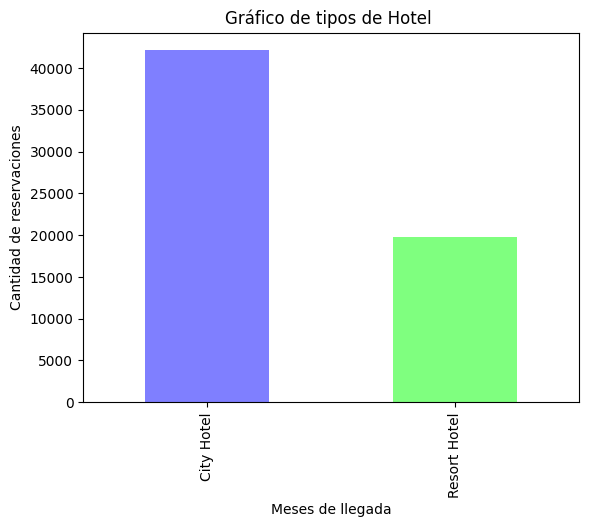

In [27]:
colores=[(0,0,1),(0,1,0),(1,0,0),(1,0,1),(1,1,0),(0,1,1),(0,0,0)]

gr=df['hotel'].value_counts().plot.bar(alpha=0.5,color=colores ,title="Gráfico de tipos de Hotel ", xlabel="Meses de llegada",ylabel="Cantidad de reservaciones")

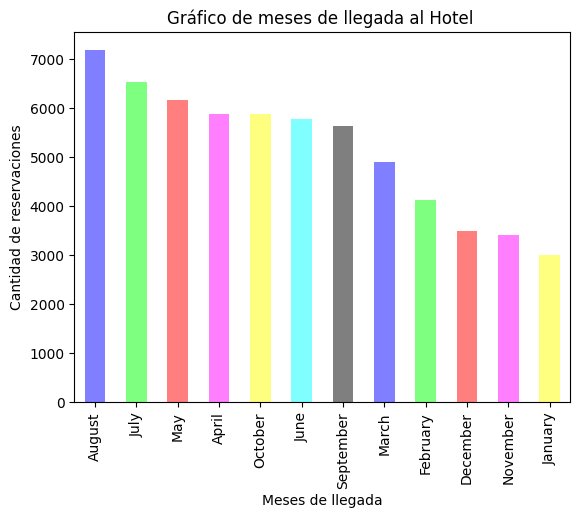

In [28]:
gr=df['month'].value_counts().plot.bar(alpha=0.5,color=colores ,title="Gráfico de meses de llegada al Hotel ", xlabel="Meses de llegada",ylabel="Cantidad de reservaciones")

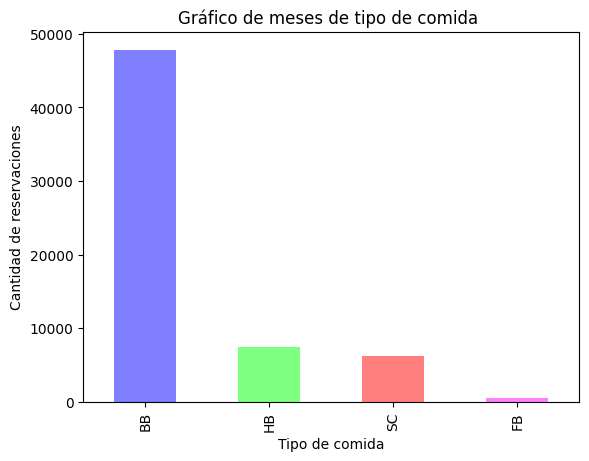

In [29]:
gr=df['meal'].value_counts().plot.bar(alpha=0.5,color=colores ,title="Gráfico de meses de tipo de comida ", xlabel="Tipo de comida",ylabel="Cantidad de reservaciones")

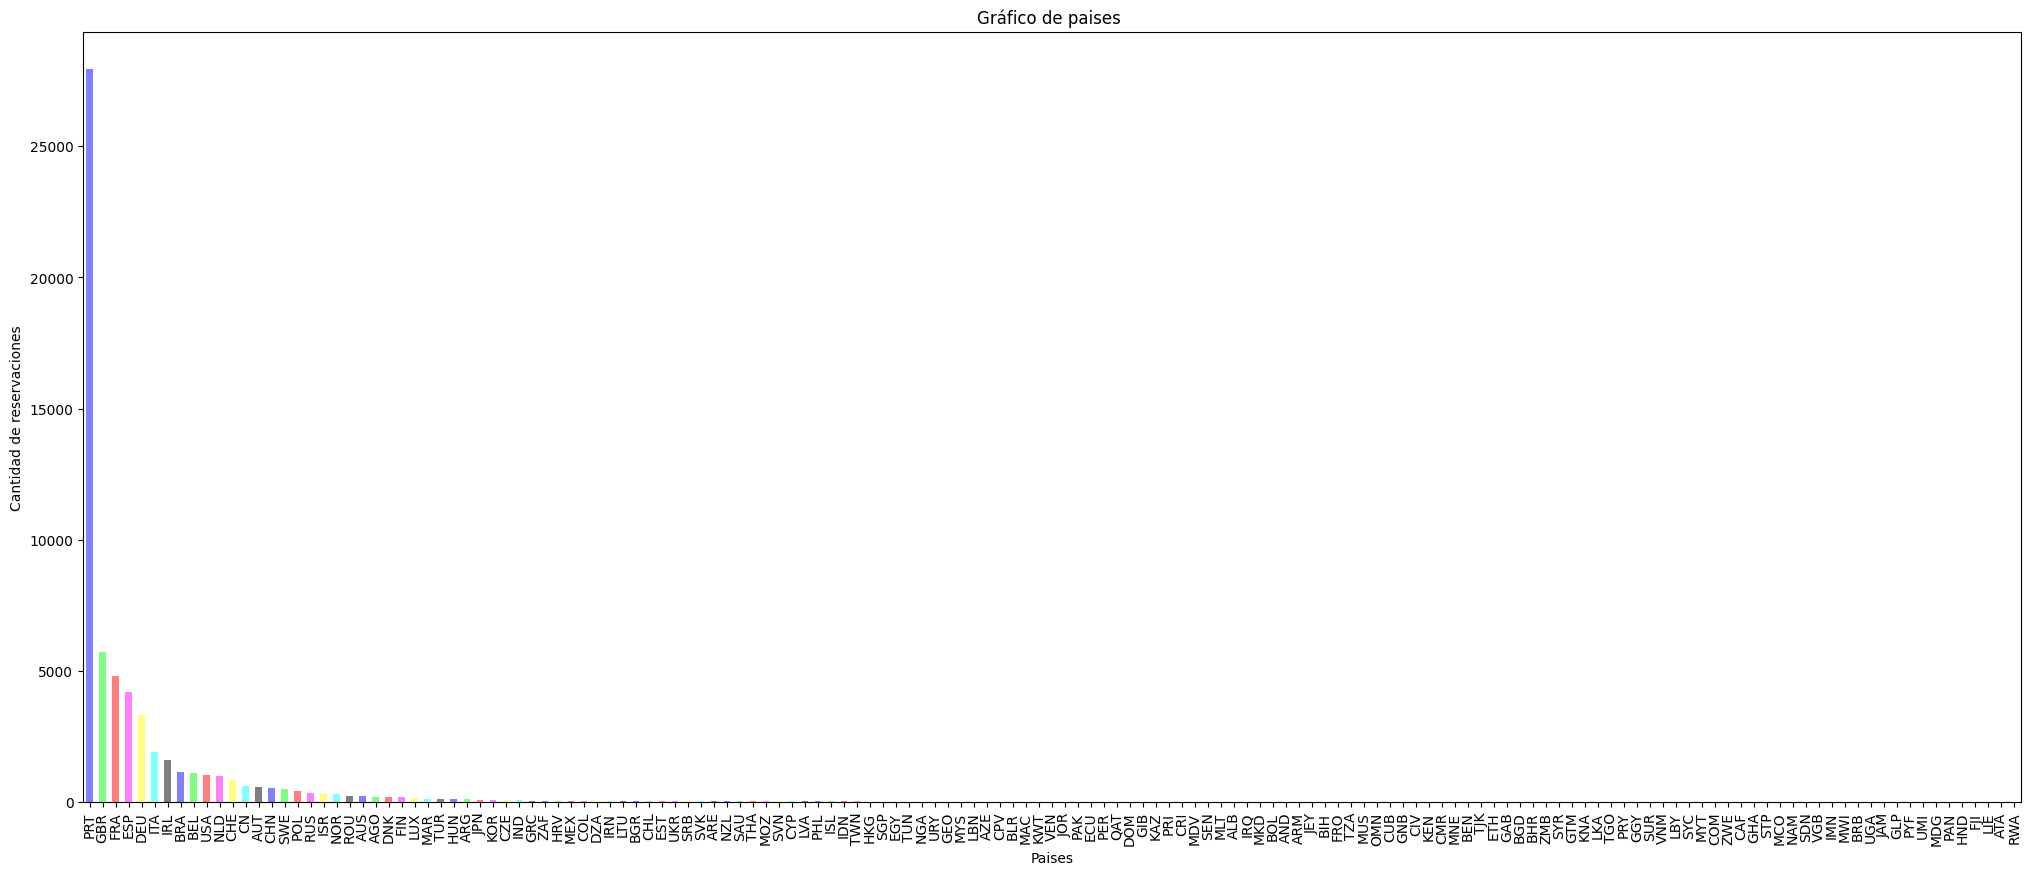

In [30]:
#Parece que se necesita otro grafico!! PARECE QUE UN TREEMAP 

"""
#eje_y = ds_agrupado_Pclass['Survived'].tolist() 
sizes= (df["country"]).value_counts() # proportions of the categories

label=df["country"].unique()

squarify.plot(sizes=sizes, label=label, alpha=0.6).set(title='Treemap with Squarify')
plt.axis('off')
plt.show()  #TREE MAP TIRA ERROR PORQUE labels=150 y bars=149, dado que tengo datos faltantes 
"""
#gr=df['country'].value_counts().sort_values(ascending=False).plot.bar(figsize=(25,10), xlabel="Pais",ylabel="Frecuencia")
plt.figure(figsize=(25, 10))
gr=df['country'].value_counts().plot.bar(alpha=0.5,color=colores ,title="Gráfico de paises ", xlabel="Paises",ylabel="Cantidad de reservaciones")


In [31]:
df_country = df.copy()
df_country['country'].value_counts().head(20)

PRT    27950
GBR     5733
FRA     4809
ESP     4210
DEU     3312
ITA     1911
IRL     1617
BRA     1152
BEL     1124
USA     1021
NLD      982
CHE      847
CN       597
AUT      581
CHN      545
SWE      481
POL      430
RUS      337
ISR      322
NOR      302
Name: country, dtype: int64

In [32]:
paises_comunes = ['PRT','GBR','FRA','ESP','DEU','ITA','IRL', 'BRA', 'BEL', 'USA', 'NLD', 'CHE', 'CN', 'AUT', 'CHN', 'SWE', 'POL', 'RUS', 'ISR', 'NOR']
df.loc[~df.loc[:,"country"].isin(paises_comunes),"country"]="OTHER"


<Axes: xlabel='pais', ylabel='Cantidad de reservas'>

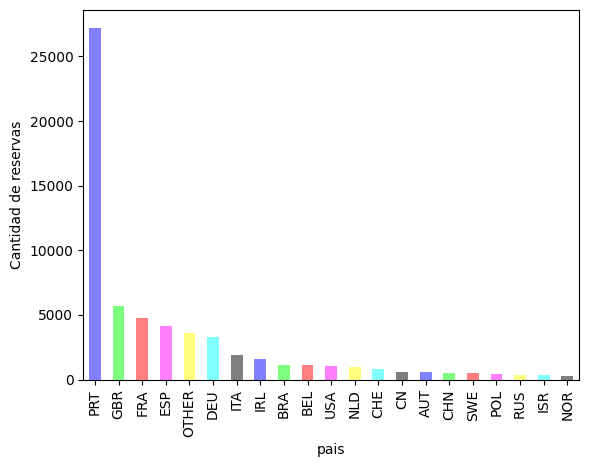

In [118]:
df['country'].value_counts().sort_values(ascending=False).plot.bar(alpha=0.5,color=colores, xlabel="pais" ,ylabel="Cantidad de reservas")

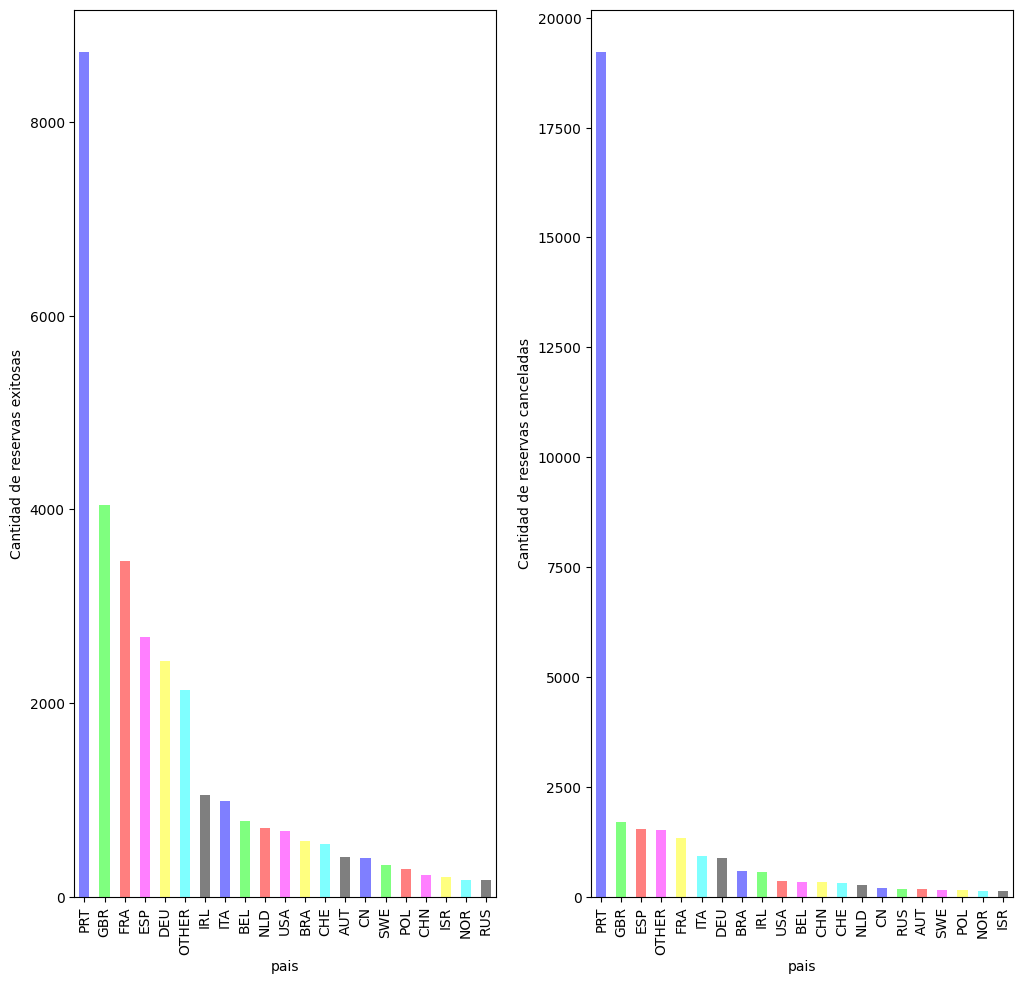

In [34]:
df_country_canceled = df[df['is_canceled'] == 1]
df_country_not_canceled = df[df['is_canceled'] == 0]

fig, ax = plt.subplots(1,2, figsize=(10,10)) #1 fila 2 col

colores=[(0,0,1),(0,1,0),(1,0,0),(1,0,1),(1,1,0),(0,1,1),(0,0,0)]

gr=df_country_canceled['country'].value_counts().sort_values(ascending=False).plot.bar(alpha=0.5,color=colores, xlabel="pais" ,ylabel="Cantidad de reservas canceladas")
plt.sca(ax[0])
plt.xticks(fontsize=10, rotation=90)

plt.tight_layout() #espacio entre subplots

gr=df_country_not_canceled['country'].value_counts().sort_values(ascending=False).plot.bar(alpha=0.5,color=colores, xlabel="pais" ,ylabel="Cantidad de reservas exitosas")
plt.sca(ax[1])
plt.xticks(fontsize=10, rotation=90)
plt.show()

<Axes: xlabel='pais', ylabel='Cantidad de reservas'>

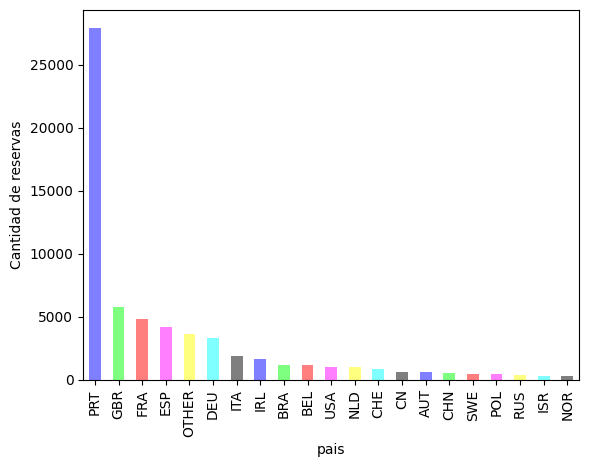

In [35]:
df['country'].value_counts().sort_values(ascending=False).plot.bar(alpha=0.5,color=colores, xlabel="pais" ,ylabel="Cantidad de reservas")

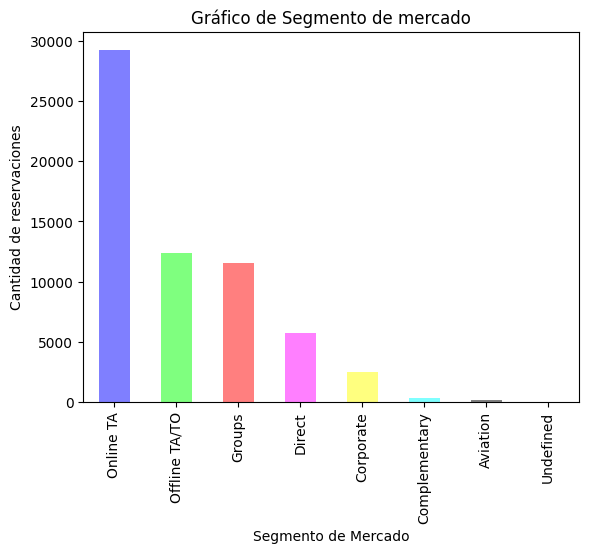

In [36]:
#TENEMOS QUE VER LOS 2 UNDEFINED 
gr=df['market_segment'].value_counts().plot.bar(alpha=0.5,color=colores ,title="Gráfico de Segmento de mercado", xlabel="Segmento de Mercado",ylabel="Cantidad de reservaciones")


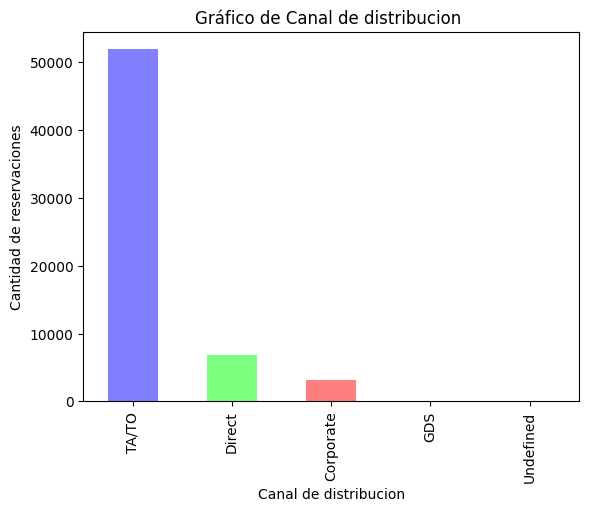

In [37]:
gr=df['distribution_channel'].value_counts().plot.bar(alpha=0.5,color=colores ,title="Gráfico de Canal de distribucion ", xlabel="Canal de distribucion",ylabel="Cantidad de reservaciones")

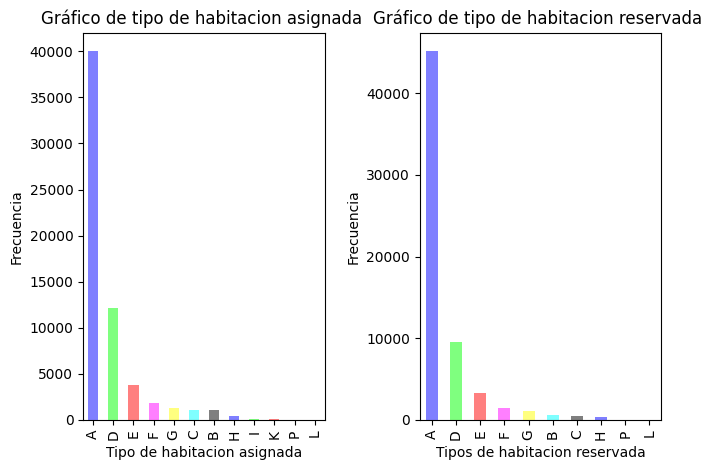

In [38]:
fig, ax = plt.subplots(1,2) #1 fila 2 col

colores=[(0,0,1),(0,1,0),(1,0,0),(1,0,1),(1,1,0),(0,1,1),(0,0,0)]

gr=df['reserved_room_type'].value_counts().plot.bar(alpha=0.5,color=colores ,title="Gráfico de tipo de habitacion reservada ", xlabel="Tipos de habitacion reservada",ylabel="Frecuencia")
plt.sca(ax[0])
plt.xticks(fontsize=10, rotation=90)

plt.tight_layout() #espacio entre subplots

gr=df['assigned_room_type'].value_counts().plot.bar(alpha=0.5,color=colores ,title="Gráfico de tipo de habitacion asignada ", xlabel="Tipo de habitacion asignada",ylabel="Frecuencia")
plt.sca(ax[1])
plt.xticks(fontsize=10, rotation=90)
plt.show()

In [39]:
room_type_populares = ["A", "D", "E", "F", "G"]
df.loc[~df.loc[:,"assigned_room_type"].isin(room_type_populares),"assigned_room_type"]="O"
df.loc[~df.loc[:,"reserved_room_type"].isin(room_type_populares),"reserved_room_type"]="O"
df

,hotel,lead_time,year,month,day,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,company,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,id,is_canceled
0,City Hotel,49,2016,September,5,1,2,1,0.0,0,...,NaN,0,Transient,115.50,0,1,Canceled,2016-08-25,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,31,0,1,2,0.0,0,...,NaN,0,Transient,42.00,1,0,Check-Out,2015-11-01,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,13,0,1,2,2.0,0,...,NaN,0,Transient,229.00,0,2,Check-Out,2016-10-14,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,12,2,5,2,0.0,0,...,NaN,0,Transient,75.00,0,0,Canceled,2016-11-29,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,19,2,5,2,0.0,0,...,NaN,0,Transient-Party,75.00,0,1,Check-Out,2017-03-26,28c75445-c603-413a-babf-ad377018b592,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61908,Resort Hotel,24,2017,January,27,0,2,2,0.0,0,...,NaN,0,Transient,48.00,0,1,Canceled,2017-01-23,32bffef5-5404-4e86-9f39-fd2282e1ad7f,1
61909,City Hotel,0,2016,September,2,0,1,1,0.0,0,...,NaN,0,Transient,149.00,0,0,Check-Out,2016-09-03,cc922a1c-356e-42a5-a984-0b1af03c2f5c,0
61910,City Hotel,10,2017,May,8,1,2,1,0.0,0,...,153.0,0,Transient,95.00,0,0,Check-Out,2017-05-11,76fb0e83-59df-43ee-9c33-aec51030ed45,0
61911,Resort Hotel,143,2015,October,10,2,5,2,0.0,0,...,NaN,0,Transient,36.05,0,0,Canceled,2015-07-08,01906859-1094-4e37-b13e-b015b594d159,1


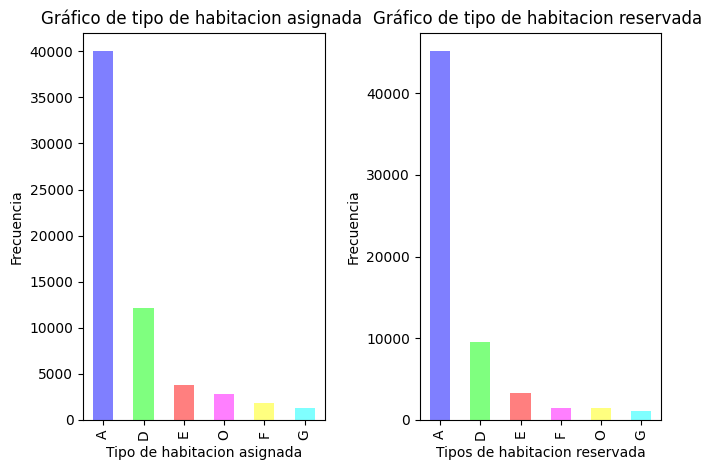

In [40]:
fig, ax = plt.subplots(1,2) #1 fila 2 col

colores=[(0,0,1),(0,1,0),(1,0,0),(1,0,1),(1,1,0),(0,1,1),(0,0,0)]

gr=df['reserved_room_type'].value_counts().plot.bar(alpha=0.5,color=colores ,title="Gráfico de tipo de habitacion reservada ", xlabel="Tipos de habitacion reservada",ylabel="Frecuencia")
plt.sca(ax[0])
plt.xticks(fontsize=10, rotation=90)

plt.tight_layout() #espacio entre subplots

gr=df['assigned_room_type'].value_counts().plot.bar(alpha=0.5,color=colores ,title="Gráfico de tipo de habitacion asignada ", xlabel="Tipo de habitacion asignada",ylabel="Frecuencia")
plt.sca(ax[1])
plt.xticks(fontsize=10, rotation=90)
plt.show()

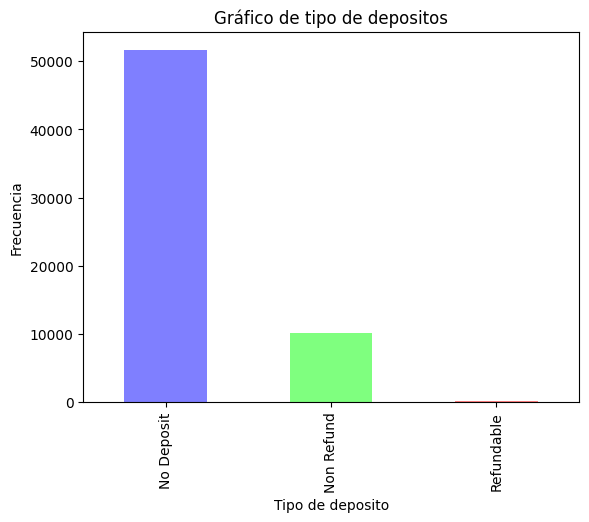

In [41]:
gr=df['deposit_type'].value_counts().plot.bar(alpha=0.5,color=colores ,title="Gráfico de tipo de depositos", xlabel="Tipo de deposito",ylabel="Frecuencia")

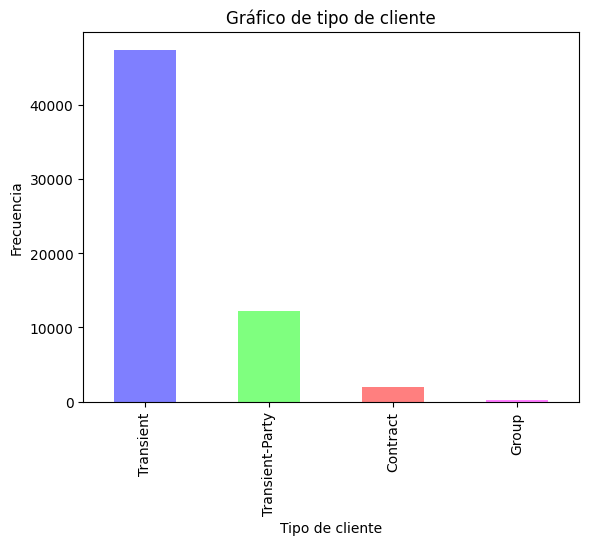

In [42]:
gr=df['customer_type'].value_counts().plot.bar(alpha=0.5,color=colores ,title="Gráfico de tipo de cliente", xlabel="Tipo de cliente",ylabel="Frecuencia")

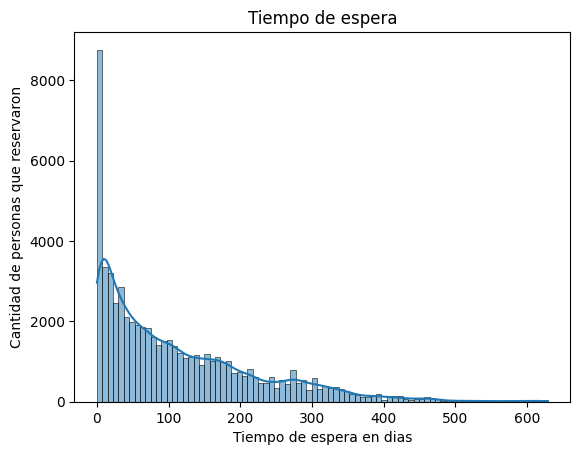

In [43]:
#Graficamos las variables cuantitativas
#Vemos graficos de histogramas y densidad(histograma suavizado)
sns_hist=sns.histplot(data=df['lead_time'], kde=True, alpha = 0.5).set(title="Tiempo de espera",xlabel="Tiempo de espera en dias",ylabel="Cantidad de personas que reservaron")

(array([1]), [Text(1, 0, 'stays_in_weekend_nights')])

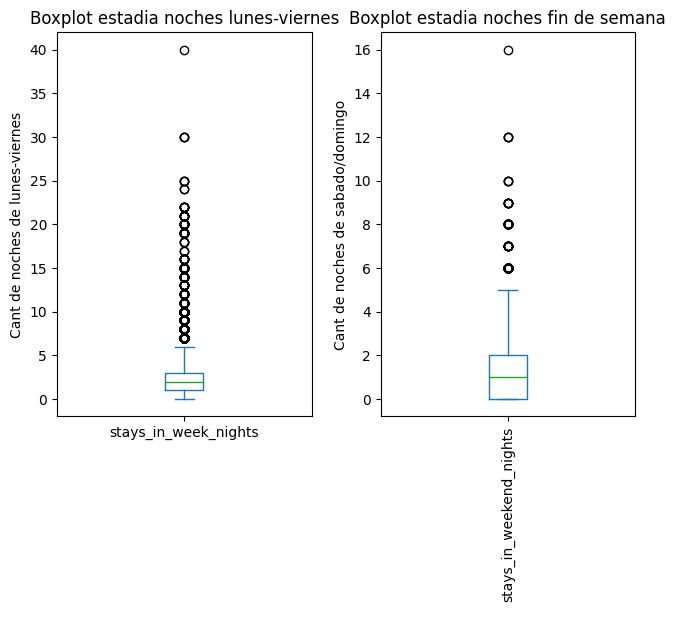

In [44]:

#gr=df['stays_in_weekend_nights'].value_counts().plot.bar(alpha=0.5,title="Gráfico de tipo de depositos", xlabel="Tipo de deposito",ylabel="Frecuencia")
#Es de soprte discreto pero no llego a ver la distribucion en los ultimos por lo que decido
fig, ax = plt.subplots(1,2) #1 fila 2 col


grf=df['stays_in_weekend_nights'].plot.box(title="Boxplot estadia noches fin de semana",xlabel=" ",ylabel="Cant de noches de sabado/domingo")

plt.sca(ax[0])
plt.xticks(fontsize=10, rotation=90)

plt.tight_layout() #espacio entre subplots
grf=df['stays_in_week_nights'].plot.box(title="Boxplot estadia noches lunes-viernes",xlabel=" ",ylabel="Cant de noches de lunes-viernes")
plt.sca(ax[1])
plt.xticks(fontsize=10, rotation=90)

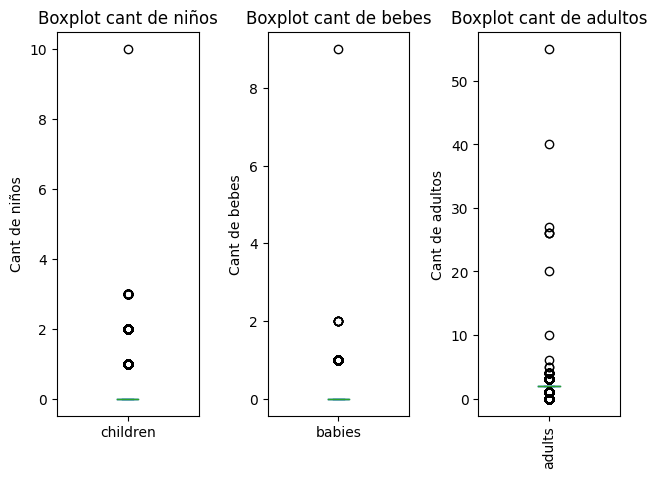

In [45]:
fig, ax = plt.subplots(1,3) #1 fila 3 col


grf=df['adults'].plot.box(title="Boxplot cant de adultos",xlabel=" ",ylabel="Cant de adultos") 

plt.sca(ax[0])
plt.xticks(fontsize=10, rotation=90)
plt.tight_layout()

grf=df['children'].plot.box(title="Boxplot cant de niños",xlabel=" ",ylabel="Cant de niños") 
plt.sca(ax[1])
plt.xticks(fontsize=10, rotation=90)
plt.tight_layout()

grf=df['babies'].plot.box(title="Boxplot cant de bebes",xlabel=" ",ylabel="Cant de bebes") 
plt.sca(ax[2])
plt.xticks(fontsize=10, rotation=90)
plt.show()
#Vemos que la mayoria de reservaciones a grandes rasgos son de 0 a 10 adultos

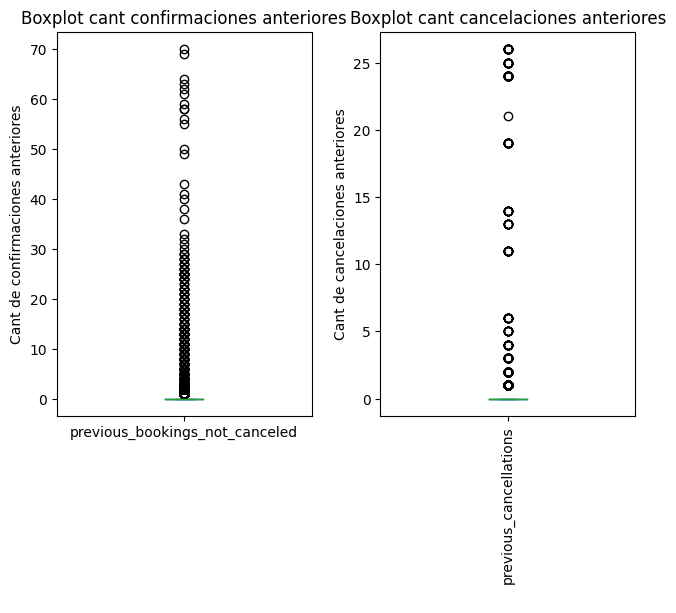

In [46]:

fig, ax = plt.subplots(1,2) #1 fila 3 col


grf=df['previous_cancellations'].plot.box(title="Boxplot cant cancelaciones anteriores",xlabel=" ",ylabel="Cant de cancelaciones anteriores")
plt.sca(ax[0])
plt.xticks(fontsize=10, rotation=90)

plt.tight_layout()

grf=df['previous_bookings_not_canceled'].plot.box(title="Boxplot cant confirmaciones anteriores",xlabel=" ",ylabel="Cant de confirmaciones anteriores") 
plt.sca(ax[1])
plt.xticks(fontsize=10, rotation=90)
plt.show()

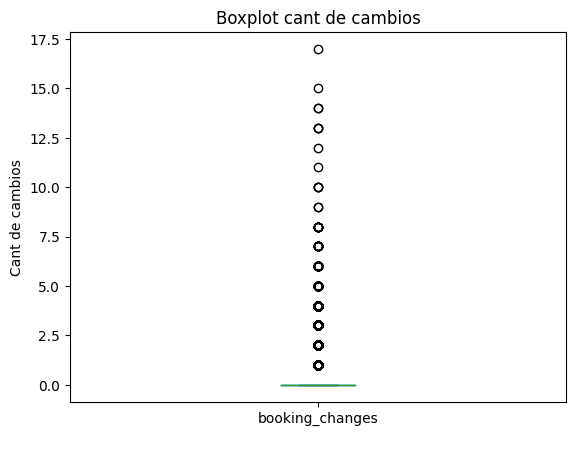

In [47]:
grf=df['booking_changes'].plot.box(title="Boxplot cant de cambios",xlabel=" ",ylabel="Cant de cambios")

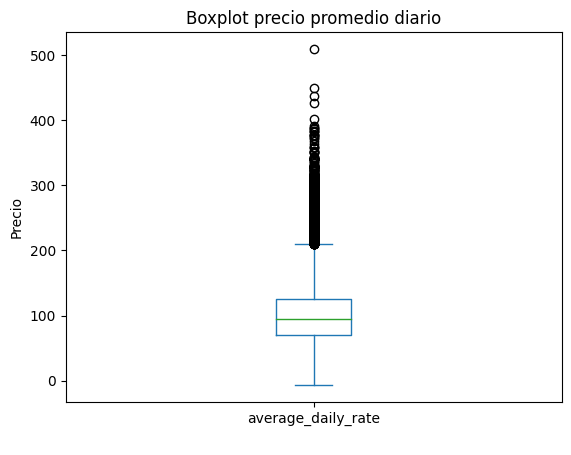

In [48]:
grf=df['average_daily_rate'].plot.box(title="Boxplot precio promedio diario",xlabel=" ",ylabel="Precio")

## ● Analisis de las correlaciones existentes entre las variables

Correlacion de variables cuantitativas




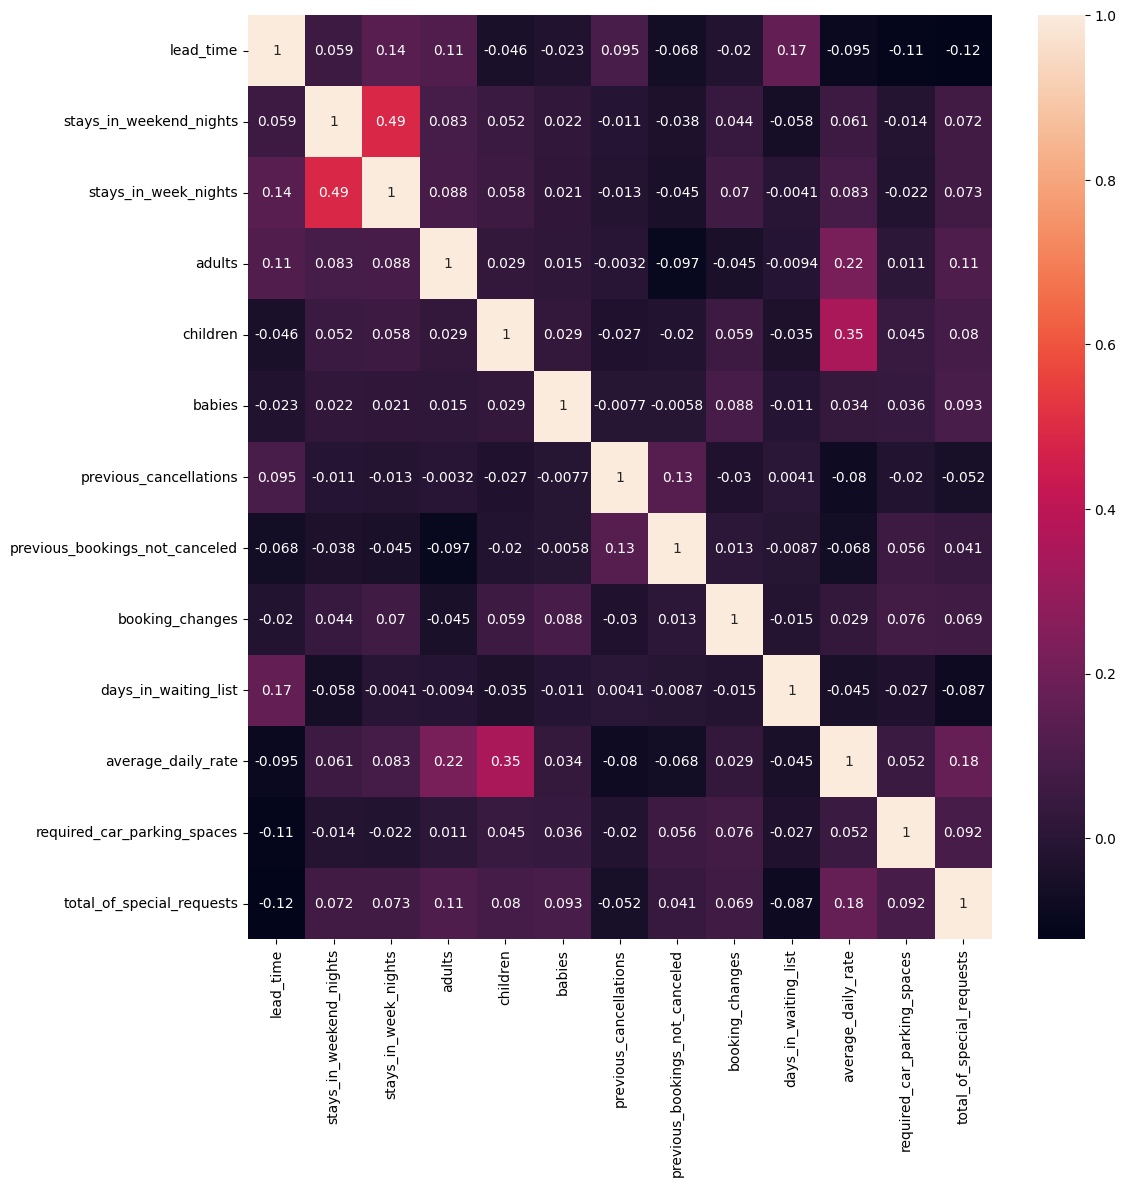

In [49]:
#df_booking_changes = df[variables_cuantitativas] #d'f filtrado
matriz_correlacion =(df[variables_cuantitativas]).corr()
plt.figure(figsize=(12, 12))
sns.heatmap(matriz_correlacion, annot = True) 
#plt.figure(figsize=(4, 2))
#df.plot(figsize=(12,18))
#sns.set(rc = {'figure.figsize':(16,9)})
plt.show()

Analisis de correlaciones:
- stays_in_week_nights and stays_in_weekend_nights: correlacion positiva
- lead_time and average_daily_rate: correlacion negativa 
- average_daily_rate and children : correlacion positiva
- average_daily_rate and adults : correlacion positiva
- average_daily_rate and total_of_special_request : correlacion positiva

OJO: es un analisis previo(con outliers) todavia no podemos asegurar que correlacion indica dependencia.

In [50]:
#variables cualitativas VDeCramer

## ● Analizar la relación de las variables con el target (is_canceled)



In [51]:
df.corr().loc[:, 'is_canceled'] #Muestra la correlacion de mi variable is_canceled con cada una de las categorias.

<ipython-input-51-cc169279e591>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().loc[:, 'is_canceled'] #Muestra la correlacion de mi variable is_canceled con cada una de las categorias.


lead_time                         0.293816
year                              0.019923
day                              -0.007371
stays_in_weekend_nights           0.001279
stays_in_week_nights              0.028439
adults                            0.060179
children                          0.006242
babies                           -0.032034
is_repeated_guest                -0.090492
previous_cancellations            0.099613
previous_bookings_not_canceled   -0.065868
booking_changes                  -0.159315
agent                            -0.086176
company                          -0.040010
days_in_waiting_list              0.050827
average_daily_rate                0.049206
required_car_parking_spaces      -0.225915
total_of_special_requests        -0.244997
is_canceled                       1.000000
Name: is_canceled, dtype: float64

Vemos que la variable que mayor relacion tiene con el target(is_canceled) es lead_time. Esto tiene sentido dado que si hay mucho tiempo de espera es mas propenso a cancelar la reserva.

Mostramos un heatmap de la correlacion que existe con todas las variables

<ipython-input-52-ecf826565423>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion =df.corr()


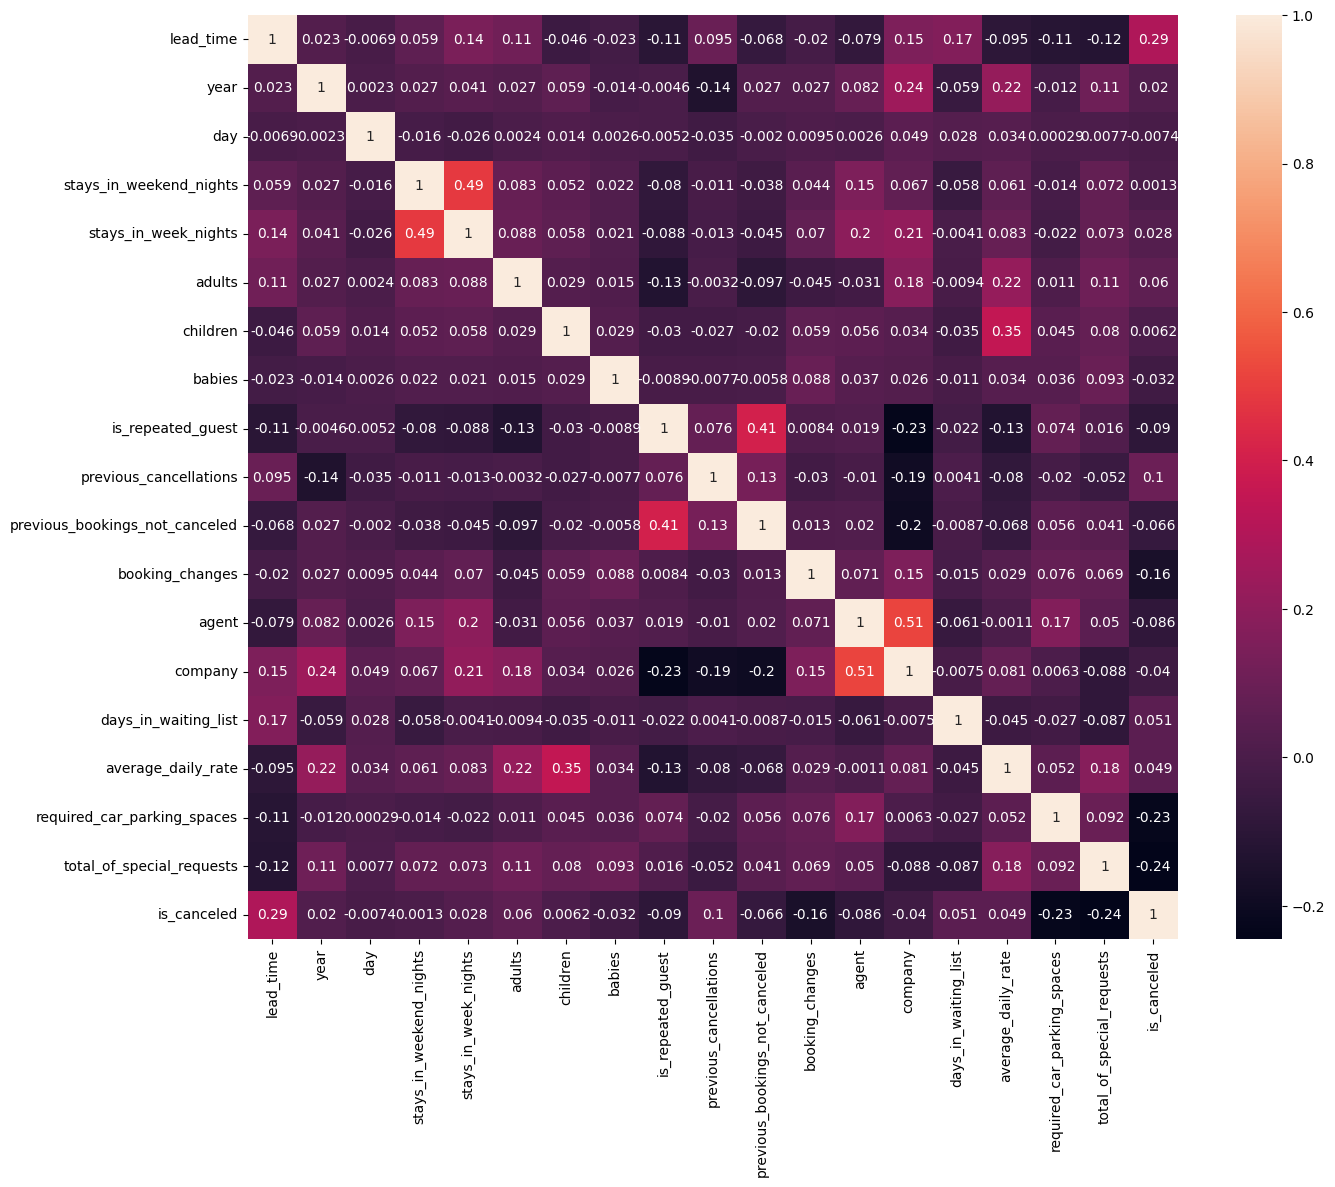

In [52]:
matriz_correlacion =df.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(matriz_correlacion, annot = True) 
#sns.set(rc = {'figure.figsize':(20,12)})
#df.plot(figsize=(30,18))

plt.show()

# b) Visualización de los datos

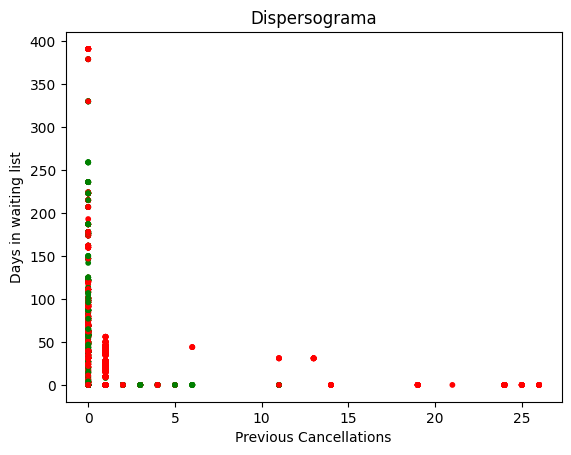

In [53]:
#Scatter plot 
#Decidimos ver la relacion de las cancelaciones previas y los dias en lista de espera relacionandolo con el target.
col = df.is_canceled.map({0:'g', 1:'r'})
grf=df.plot.scatter(x="previous_cancellations", y="days_in_waiting_list", c=col, s=10).set(title="Dispersograma",xlabel='Previous Cancellations',ylabel='Days in waiting list') 

 Vemos que si hizo mas de 8 cancelaciones previas, es muy probable que cancele la reserva.
 
Tambien vemos que si estuvo mas de 280 dias en la lista de espera y a pesar que no tuvo ninguna cancelacion previa, es probable que cancele la reserva.

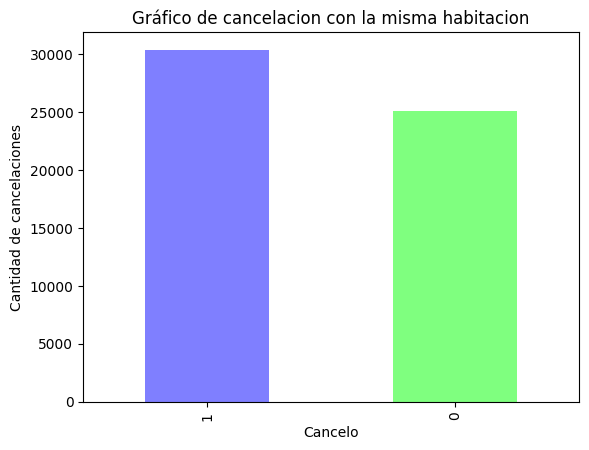

In [54]:
#Consideramos que puede haber una relacion entre el target y que le asignen la misma habitacion que reservaron o el caso contrario.
room_assigned_equal_reserved = df[((df['reserved_room_type'] == df['assigned_room_type']) ) ]
room_assigned_different_reserved = df[((df['reserved_room_type'] != df['assigned_room_type']) )]
#plt.figure(figsize=(4, 2))
gr= room_assigned_equal_reserved['is_canceled'].value_counts().plot.bar(alpha=0.5,color=colores ,title="Gráfico de cancelacion con la misma habitacion", xlabel="Cancelo",ylabel="Cantidad de cancelaciones")

En este grafico, vemos que a los que le asignaron el mismo tipo de habitacion que reservaron, tienden a cancelar mas. Esto tendria logica si lo pensamos de la manera en que al realizado la reserva, a los clientes les hubiera gustado que se le asigne una de mejor categoria.

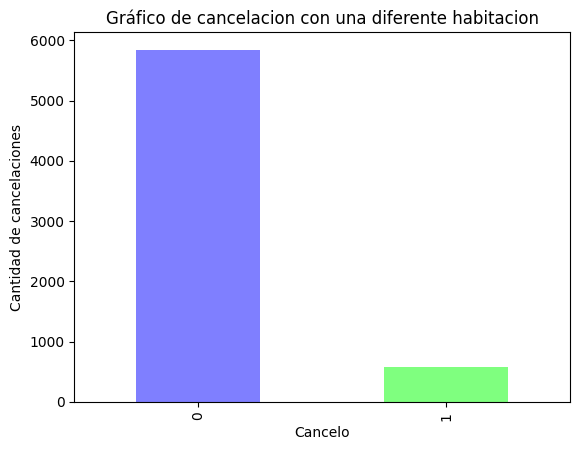

In [55]:
gr= room_assigned_different_reserved['is_canceled'].value_counts().plot.bar(alpha=0.5,color=colores ,title="Gráfico de cancelacion con una diferente habitacion", xlabel="Cancelo",ylabel="Cantidad de cancelaciones")

Por otro lado, vemos que a los que le asignaron distinto tipo de habitacion que reservaron, tienden a no cancelar . Asi mismo, aca consideramos que los que eservaron se les termino asignando una habitacion de mejor categoria.

Ahora, decidimos agrupar 3 columnas del dataset a una sola que indique el dia de llegada y castearlo a tipo datetime

In [56]:
months = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8,'September':9, 'October':10,'November':11, 'December': 12 }
df.month = df.month.map(months)

In [57]:
arrivaldates = df.copy() 
import datetime

date=arrivaldates.apply(lambda x: datetime.date(int(x['year']), x['month'], x['day']),axis=1)

date = pd.to_datetime(date)

df = df.drop(columns=['year', 'month', 'day'])

df.insert(0, 'arrival_date', date)


In [58]:
df.head() #Imprimimos para asegurarnos que se hizo el cambio correctamente

,arrival_date,hotel,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,company,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,id,is_canceled
0,2016-09-05,City Hotel,49,1,2,1,0.0,0,BB,USA,...,NaN,0,Transient,115.5,0,1,Canceled,2016-08-25,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,2015-10-31,Resort Hotel,4,0,1,2,0.0,0,BB,PRT,...,NaN,0,Transient,42.0,1,0,Check-Out,2015-11-01,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,2016-10-13,City Hotel,25,0,1,2,2.0,0,BB,CHE,...,NaN,0,Transient,229.0,0,2,Check-Out,2016-10-14,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,2016-12-12,City Hotel,26,2,5,2,0.0,0,BB,PRT,...,NaN,0,Transient,75.0,0,0,Canceled,2016-11-29,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,2017-03-19,City Hotel,104,2,5,2,0.0,0,BB,FRA,...,NaN,0,Transient-Party,75.0,0,1,Check-Out,2017-03-26,28c75445-c603-413a-babf-ad377018b592,0


# c) Datos Faltantes

## ● Analisis de datos faltantes por columna

In [59]:
#Vemos el porcentaje de datos faltantes en porcentaje
filas_totales=df.shape[0]
print(df.isna().sum()/filas_totales*100)

arrival_date                       0.000000
hotel                              0.000000
lead_time                          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.006461
babies                             0.000000
meal                               0.000000
country                            0.000000
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                       0.000000
agent                             12.743689
company                           94.908985
days_in_waiting_list               0.000000
customer_type                   

## ● Graficar para cada variable el porcentaje de datos faltantes con respecto al total del dataset

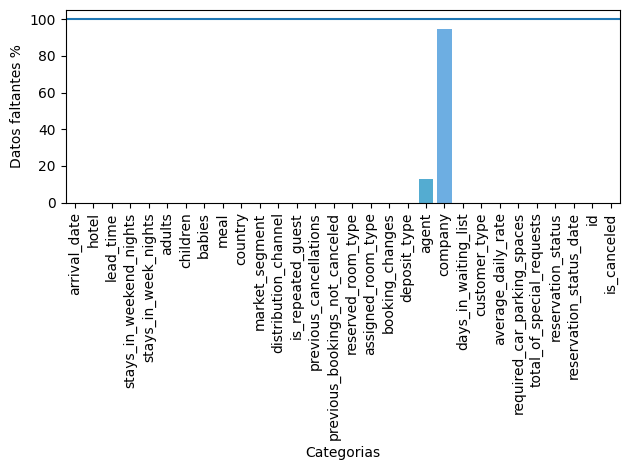

In [60]:
porcentaje_datos_faltantes = (df.isna().sum()/filas_totales*100)
graph = sns.barplot(x=porcentaje_datos_faltantes.index, y=porcentaje_datos_faltantes.values)
graph.axhline(100)
plt.ylabel("Datos faltantes %")
plt.xlabel("Categorias")
plt.xticks(rotation=90)
plt.tight_layout()

In [61]:
#Decidimos eliminar la columna de company dado que el porcentaje de datos nulos es bastante alto, y seria casi imposible poder modificarlo.
#Tambien decidimos eliminar la columna 'reservation_status_date' dado que en la catedra se decidio eliminar la categoria 'reservation_status', y ya no tendria que afectar en nada a nuestro analisis.
df= df.drop(columns=['company', 'reservation_status_date'])
print(df.columns.to_list()) #para asegurarnos que fueron eliminados


['arrival_date', 'hotel', 'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'days_in_waiting_list', 'customer_type', 'average_daily_rate', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'id', 'is_canceled']


## ● Comparar las distribuciones de los atributos modificados

In [62]:
#Sabemos que hay datos nulos en children, por lo que queremos ver cuantos son.
df['children'].isna().sum()

4

In [63]:
df[np.isnan(df['children']) == True]

,arrival_date,hotel,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,deposit_type,agent,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,id,is_canceled
27359,2015-08-05,City Hotel,1,0,2,3,NaN,0,BB,PRT,...,No Deposit,NaN,0,Transient-Party,18.0,0,2,Canceled,6ad2b270-d3ae-464f-9d4d-0722e4c4e7bc,1
32654,2015-08-05,City Hotel,1,0,2,2,NaN,0,BB,PRT,...,No Deposit,14.0,0,Transient-Party,12.0,0,1,Canceled,af8b8f11-dae4-494a-81f9-9aabb9d3b9ba,1
50323,2015-08-13,City Hotel,8,2,5,2,NaN,0,BB,PRT,...,No Deposit,9.0,0,Transient-Party,76.5,0,1,Canceled,322fd306-7177-4752-88c2-891293fceba6,1
58511,2015-08-03,City Hotel,2,1,0,2,NaN,0,BB,PRT,...,No Deposit,NaN,0,Transient-Party,12.0,0,1,Canceled,d94b4fca-243f-498c-a52f-14b52e7e5e72,1


Vemos que los 4 casos viajan a un city_hotel en agosto del 2015 con 2 adultos, 0 bebes y desde Portugal.

In [64]:
predicted_children = df[(df['hotel'] == 'City Hotel') & (df['adults']== 2) & (df['babies'] == 0) & (df['country'] == 'PRT') & df['arrival_date'].between('2015-08-01', '2015-08-31')]
predicted_children['children'].mode() #vemos que con esas caracteristicas, la moda me da 0, decido modificarlo por 0s

0    0.0
Name: children, dtype: float64

In [65]:
df['children'] = df['children'].fillna(0.0)
df['children'].astype(int)

0        0
1        0
2        2
3        0
4        0
        ..
61908    0
61909    0
61910    0
61911    0
61912    0
Name: children, Length: 61913, dtype: int64

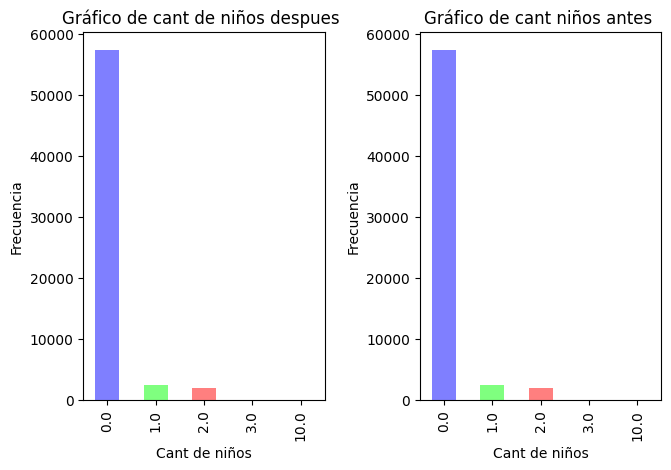

In [66]:
fig, ax = plt.subplots(1,2) #1 fila 2 col

colores=[(0,0,1),(0,1,0),(1,0,0),(1,0,1),(1,1,0),(0,1,1),(0,0,0)]

gr=df_original['children'].value_counts().plot.bar(alpha=0.5,color=colores ,title="Gráfico de cant niños antes ", xlabel="Cant de niños",ylabel="Frecuencia")
plt.sca(ax[0])
plt.xticks(fontsize=10, rotation=90)

plt.tight_layout() #espacio entre subplots

gr=df['children'].value_counts().plot.bar(alpha=0.5,color=colores ,title="Gráfico de cant de niños despues ", xlabel="Cant de niños",ylabel="Frecuencia")
plt.sca(ax[1])
plt.xticks(fontsize=10, rotation=90)
plt.show()

Vemos que la distribucion no fue afectada, esto tambien se ebe dado que la cantidad de nulos era muy baja con respecto al total de datos.

In [67]:
#Sabemos que hay datos nulos en agent, por lo que queremos ver cuantos son.
df['agent'].isna().sum()

7890

In [68]:
df['agent'] = df['agent'].fillna(0.0) #Cambiamos los datos faltantes por una nueva categoria llamada 0 ya que no existia previamente

In [69]:
df['agent'].isna().sum() #Verificamos que el cambio se hizo correctamente

0

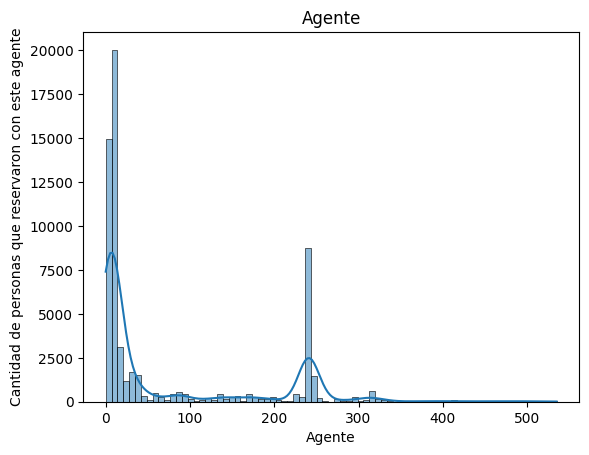

In [70]:

sns_hist=sns.histplot(data=df['agent'], kde=True, alpha = 0.5).set(title="Agente",xlabel="Agente",ylabel="Cantidad de personas que reservaron con este agente")

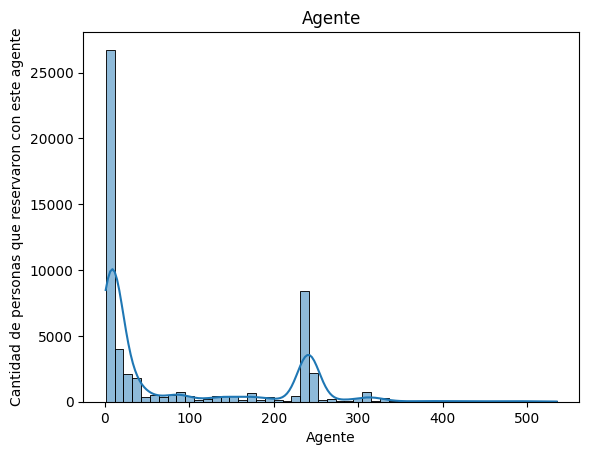

In [71]:
sns_hist=sns.histplot(data=df_original['agent'], kde=True, alpha = 0.5).set(title="Agente",xlabel="Agente",ylabel="Cantidad de personas que reservaron con este agente")


In [72]:
df_original['country'].mode() #Tiene sentido porque son hoteles de portugal

0    PRT
Name: country, dtype: object

In [73]:
df['country'] = df['country'].fillna('PRT')

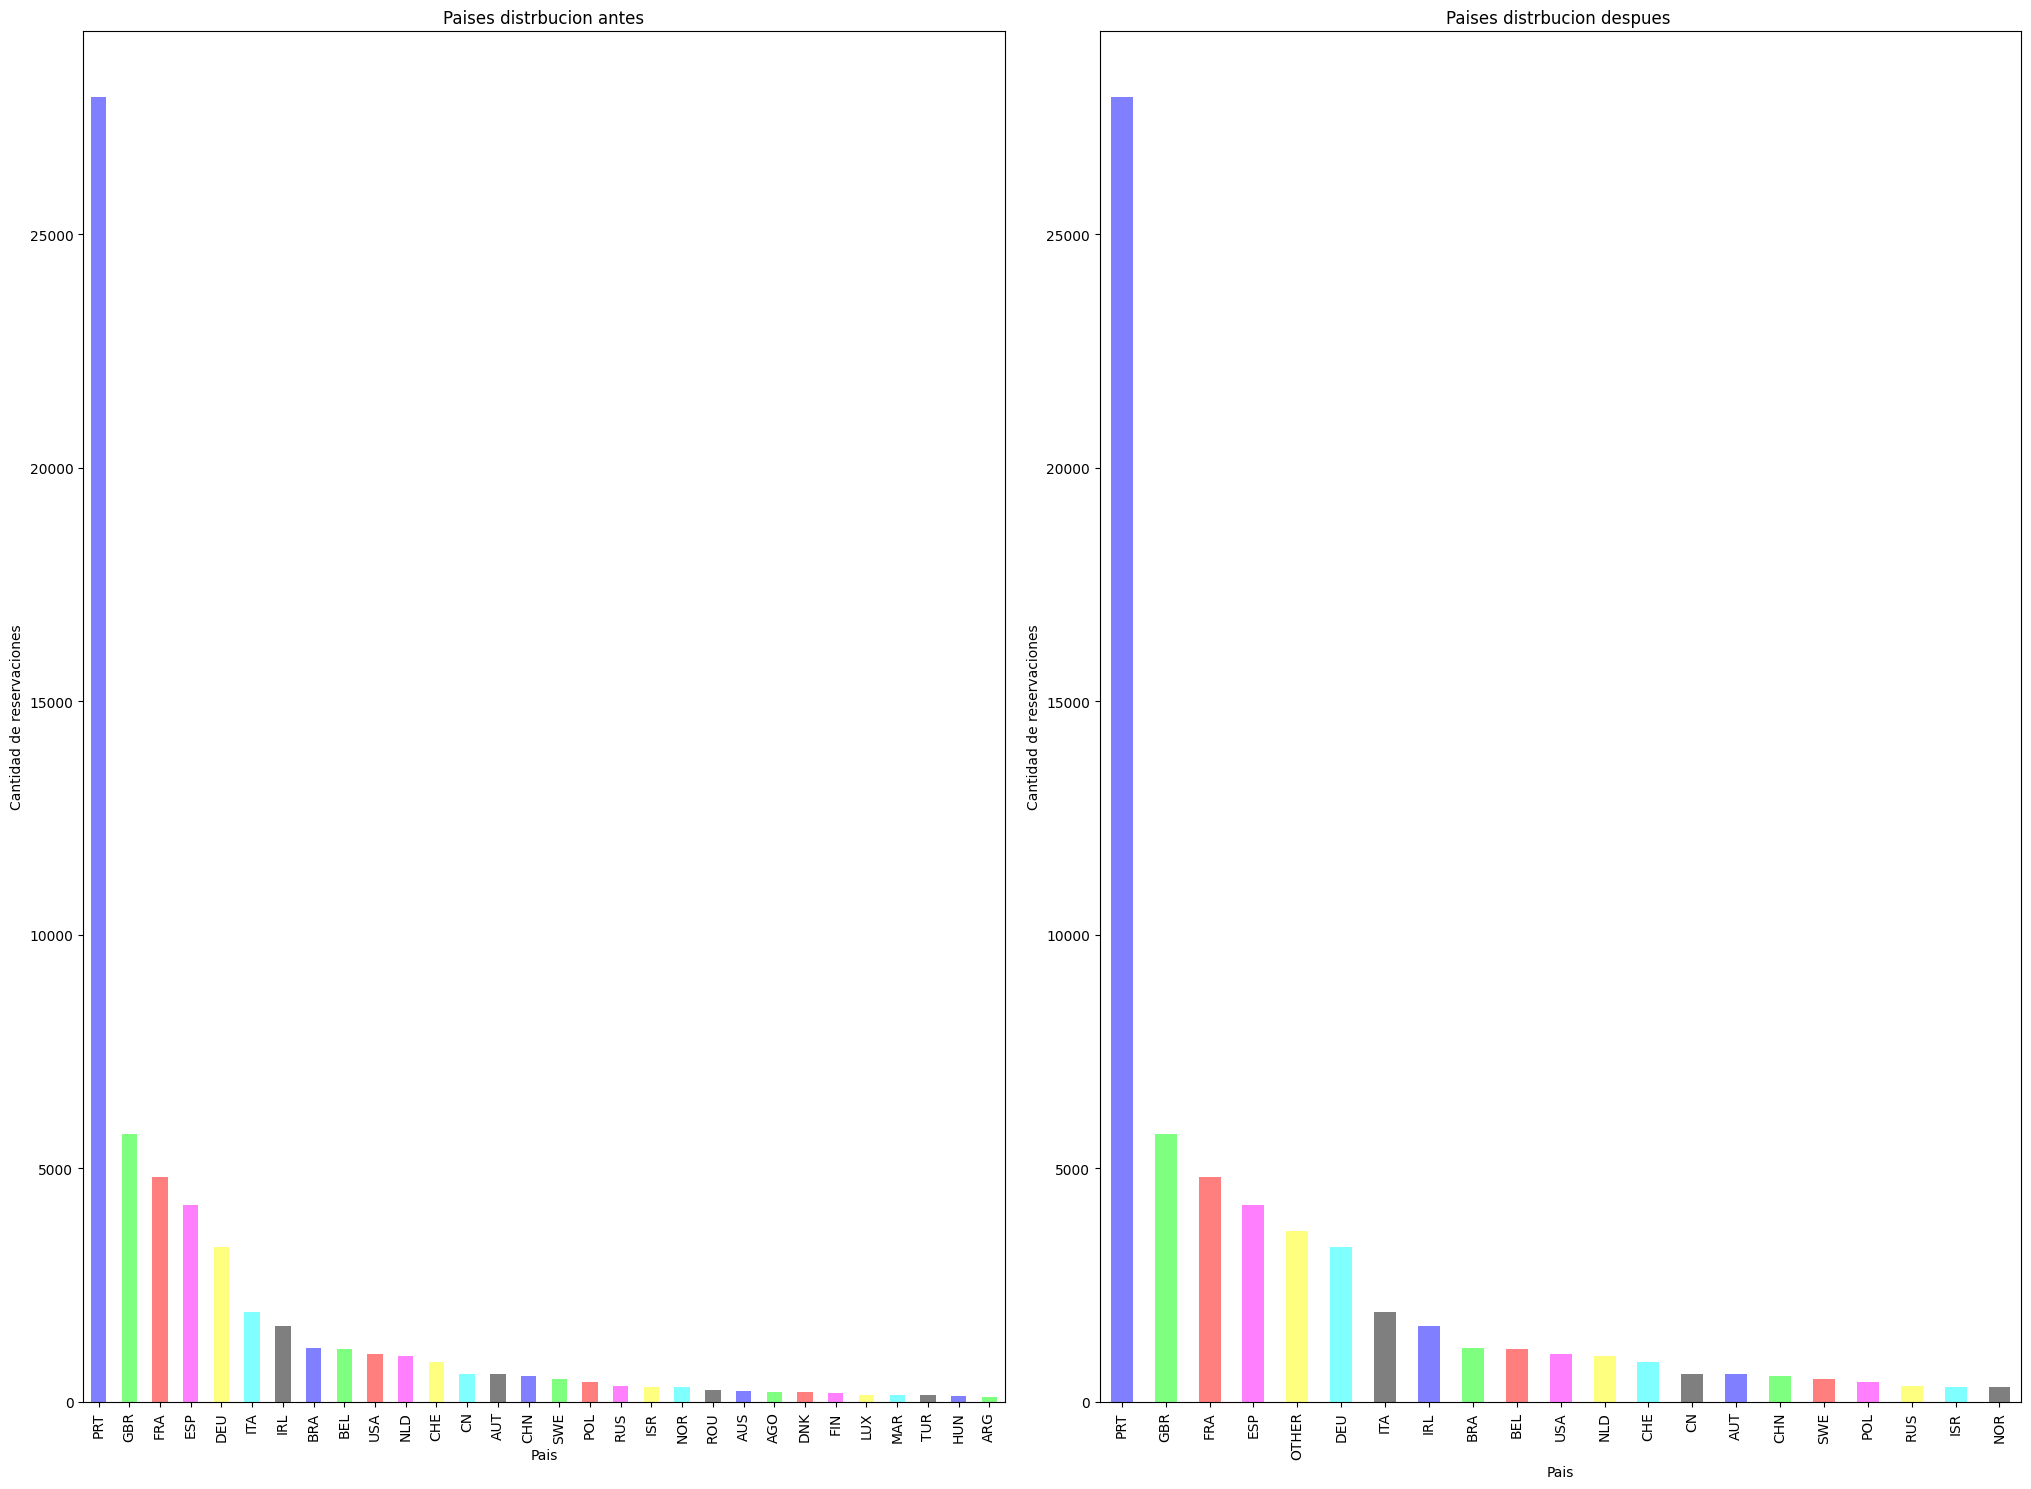

In [74]:

fig, ax = plt.subplots(1,2, figsize=(20, 15)) #1 fila 2 col

colores=[(0,0,1),(0,1,0),(1,0,0),(1,0,1),(1,1,0),(0,1,1),(0,0,0)]

gr=df['country'].value_counts().head(30).plot.bar(alpha=0.5,color=colores ,title="Paises distrbucion despues ", xlabel="Pais",ylabel="Cantidad de reservaciones")
plt.sca(ax[0])
plt.xticks(fontsize=10, rotation=90)

plt.tight_layout() #espacio entre subplots


gr=df_original['country'].value_counts().head(30).plot.bar(alpha=0.5,color=colores ,title="Paises distrbucion antes", xlabel="Pais",ylabel="Cantidad de reservaciones")
plt.sca(ax[1])
plt.xticks(fontsize=10, rotation=90)
plt.show()

Vemos que la distribucion se conserva

# d)  Valores atípicos

## ● Detectar valores atipicos de forma univariada y multivariada con graficos

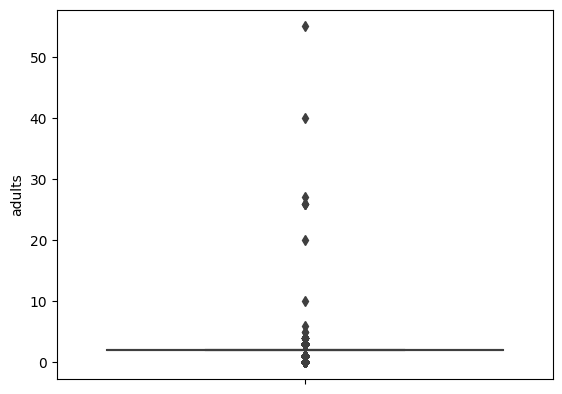

In [75]:
sns.boxplot(y=df.adults)
plt.show()

In [76]:
#z-score Peso con librería stats
zadultos = df.loc[:,['adults', 'is_canceled']]
zadultos['z_adults']=stats.zscore(df.adults)
zadultos[(zadultos['z_adults']>=3) | (zadultos['z_adults']<=-3)]

,adults,is_canceled,z_adults
96,0,1,-3.162303
212,0,1,-3.162303
270,0,1,-3.162303
326,0,0,-3.162303
464,0,0,-3.162303
...,...,...,...
60837,0,0,-3.162303
60873,4,0,3.628158
60994,0,0,-3.162303
61003,0,0,-3.162303


Segun z-score 4 es outlier pero es un valor normal de una reserva, tomamos outliers reservas de mas de 40 personas

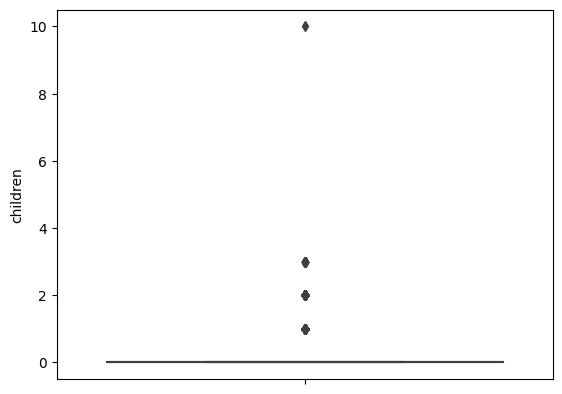

In [77]:
sns.boxplot(y=df.children)
plt.show()

In [78]:
df[df['children'] > 8]

,arrival_date,hotel,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,deposit_type,agent,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,id,is_canceled
49181,2015-07-12,Resort Hotel,55,4,10,2,10.0,0,BB,PRT,...,No Deposit,8.0,0,Contract,133.16,0,1,No-Show,44093355-c1c8-41eb-bcb4-40dc494fa1a9,1


Tomamos como outliers las reservas con mas de 8 niños 

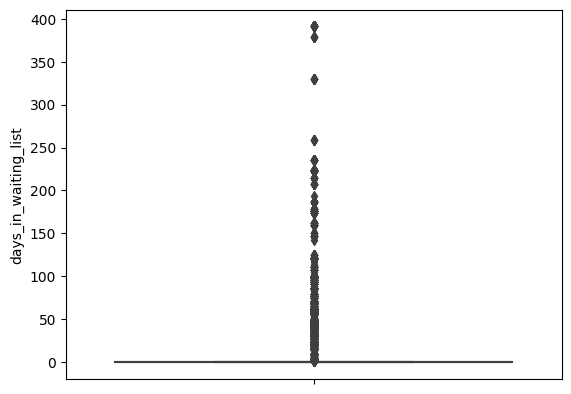

In [79]:
sns.boxplot(y=df.days_in_waiting_list)
plt.show()

In [80]:
#z-score days in waiting list
zdiwl = df.loc[:,['days_in_waiting_list', 'is_canceled']]
zdiwl['z_diwl']=stats.zscore(df.days_in_waiting_list)
zdiwl_outliers = zdiwl[(zdiwl['z_diwl']>=3) | (zdiwl['z_diwl']<=-3)]
zdiwl_outliers

,days_in_waiting_list,is_canceled,z_diwl
11,162,1,8.559080
52,91,1,4.745760
76,93,1,4.853177
155,60,1,3.080789
206,77,0,3.993837
...,...,...,...
61751,68,1,3.510458
61757,62,1,3.188206
61797,259,0,13.768829
61805,178,1,9.418420


In [81]:
zprevious_cancellations = df.loc[:,['previous_cancellations', 'is_canceled']]
zprevious_cancellations['z_previous_cancellations']=stats.zscore(df.previous_cancellations)
zprevious_cancellations_outlier = zprevious_cancellations[(zprevious_cancellations['z_previous_cancellations']>=3) | (zprevious_cancellations['z_previous_cancellations']<=-3)]
zprevious_cancellations_outlier.sort_values('previous_cancellations')

,previous_cancellations,is_canceled,z_previous_cancellations
60793,4,1,3.909783
20263,4,0,3.909783
5620,4,0,3.909783
20816,4,0,3.909783
30550,4,0,3.909783
...,...,...,...
15598,26,1,26.048930
23206,26,1,26.048930
6029,26,1,26.048930
53765,26,1,26.048930


In [82]:
adults_atipico = df[df['adults']==0];
adults_atipico

,arrival_date,hotel,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,deposit_type,agent,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,id,is_canceled
96,2016-05-21,City Hotel,23,2,4,0,2.0,0,BB,OTHER,...,No Deposit,9.0,0,Transient,128.49,0,0,Canceled,dcaf076d-bd38-47dd-8d9d-16be09cd5b08,1
212,2017-07-07,City Hotel,315,0,1,0,2.0,0,BB,USA,...,No Deposit,9.0,0,Transient,91.85,0,2,Canceled,55c9b5f9-b5d0-49a2-9348-c6476a0bd772,1
270,2017-02-21,City Hotel,4,0,3,0,0.0,0,SC,PRT,...,No Deposit,0.0,0,Transient-Party,0.00,0,0,Canceled,6a48e05e-c36a-41d0-b7e0-5f8b92dab109,1
326,2016-11-29,City Hotel,53,0,4,0,2.0,0,BB,OTHER,...,No Deposit,9.0,0,Transient,77.86,0,2,Check-Out,74fe3153-e2ae-4650-a375-05fc52881a56,0
464,2015-10-16,City Hotel,64,2,3,0,0.0,0,SC,FRA,...,No Deposit,50.0,0,Transient-Party,0.00,0,0,Check-Out,cfe370c2-298a-4de8-82fd-f8d418febd7f,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59982,2016-02-08,City Hotel,44,1,3,0,2.0,0,BB,ITA,...,No Deposit,9.0,0,Transient-Party,66.50,0,1,Canceled,8b700cc2-903e-4400-9c68-aba04d69de38,1
60837,2017-05-09,City Hotel,33,0,1,0,0.0,0,SC,PRT,...,No Deposit,87.0,0,Transient,200.00,0,0,Check-Out,070652d9-948b-47a3-bb96-113627bb5558,0
60994,2016-08-19,City Hotel,11,0,1,0,2.0,0,BB,BEL,...,No Deposit,9.0,0,Transient,127.60,0,1,Check-Out,17552f62-53e5-4bdf-877d-c2b9769ec27a,0
61003,2016-11-09,City Hotel,57,0,2,0,0.0,0,SC,OTHER,...,No Deposit,14.0,0,Transient,165.38,0,2,Check-Out,c6b4f9bb-b1f7-4765-a4af-5846748c13f4,0


In [83]:
children_with_babies_atipico = adults_atipico[adults_atipico['babies']!=0]
children_with_babies_atipico

,arrival_date,hotel,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,deposit_type,agent,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,id,is_canceled
41018,2015-12-09,City Hotel,22,1,4,0,2.0,1,BB,PRT,...,No Deposit,14.0,0,Transient,80.75,0,1,No-Show,66690d14-4436-42a1-9297-bc34d36e48eb,1


Tomamos como outlier a la reserva de niño con bebe sin adulto

In [84]:
children_atipico = adults_atipico[adults_atipico['babies']==0]
children_atipico

,arrival_date,hotel,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,deposit_type,agent,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,id,is_canceled
96,2016-05-21,City Hotel,23,2,4,0,2.0,0,BB,OTHER,...,No Deposit,9.0,0,Transient,128.49,0,0,Canceled,dcaf076d-bd38-47dd-8d9d-16be09cd5b08,1
212,2017-07-07,City Hotel,315,0,1,0,2.0,0,BB,USA,...,No Deposit,9.0,0,Transient,91.85,0,2,Canceled,55c9b5f9-b5d0-49a2-9348-c6476a0bd772,1
270,2017-02-21,City Hotel,4,0,3,0,0.0,0,SC,PRT,...,No Deposit,0.0,0,Transient-Party,0.00,0,0,Canceled,6a48e05e-c36a-41d0-b7e0-5f8b92dab109,1
326,2016-11-29,City Hotel,53,0,4,0,2.0,0,BB,OTHER,...,No Deposit,9.0,0,Transient,77.86,0,2,Check-Out,74fe3153-e2ae-4650-a375-05fc52881a56,0
464,2015-10-16,City Hotel,64,2,3,0,0.0,0,SC,FRA,...,No Deposit,50.0,0,Transient-Party,0.00,0,0,Check-Out,cfe370c2-298a-4de8-82fd-f8d418febd7f,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59982,2016-02-08,City Hotel,44,1,3,0,2.0,0,BB,ITA,...,No Deposit,9.0,0,Transient-Party,66.50,0,1,Canceled,8b700cc2-903e-4400-9c68-aba04d69de38,1
60837,2017-05-09,City Hotel,33,0,1,0,0.0,0,SC,PRT,...,No Deposit,87.0,0,Transient,200.00,0,0,Check-Out,070652d9-948b-47a3-bb96-113627bb5558,0
60994,2016-08-19,City Hotel,11,0,1,0,2.0,0,BB,BEL,...,No Deposit,9.0,0,Transient,127.60,0,1,Check-Out,17552f62-53e5-4bdf-877d-c2b9769ec27a,0
61003,2016-11-09,City Hotel,57,0,2,0,0.0,0,SC,OTHER,...,No Deposit,14.0,0,Transient,165.38,0,2,Check-Out,c6b4f9bb-b1f7-4765-a4af-5846748c13f4,0


In [85]:
children_babies_adults_on_zero = adults_atipico[(adults_atipico['children']==0) & (adults_atipico['babies']==0)] 
children_babies_adults_on_zero

,arrival_date,hotel,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,deposit_type,agent,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,id,is_canceled
270,2017-02-21,City Hotel,4,0,3,0,0.0,0,SC,PRT,...,No Deposit,0.0,0,Transient-Party,0.00,0,0,Canceled,6a48e05e-c36a-41d0-b7e0-5f8b92dab109,1
464,2015-10-16,City Hotel,64,2,3,0,0.0,0,SC,FRA,...,No Deposit,50.0,0,Transient-Party,0.00,0,0,Check-Out,cfe370c2-298a-4de8-82fd-f8d418febd7f,0
2249,2017-06-19,City Hotel,26,1,4,0,0.0,0,SC,GBR,...,No Deposit,9.0,0,Transient,90.00,0,1,Check-Out,ebf0cb8f-fb23-4742-ba20-99d6805fc046,0
2408,2017-03-17,City Hotel,0,0,0,0,0.0,0,SC,PRT,...,No Deposit,9.0,0,Transient,0.00,0,0,Check-Out,d9dc2c34-8489-4d83-b998-12d32ae90caa,0
2474,2016-07-06,City Hotel,244,2,4,0,0.0,0,SC,PRT,...,No Deposit,19.0,0,Transient,0.00,0,0,Canceled,3c52496c-eb31-4333-9368-f82546757556,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57225,2016-07-06,City Hotel,244,2,4,0,0.0,0,SC,PRT,...,No Deposit,19.0,0,Transient,0.00,0,0,Canceled,4899b4cc-4a9b-4de8-8984-5b3bf90ebdd5,1
57772,2016-07-19,City Hotel,0,0,1,0,0.0,0,BB,SWE,...,No Deposit,14.0,0,Transient,0.00,0,1,Check-Out,1912dcfb-8ad7-4398-9881-5354d437dbcb,0
59389,2015-08-11,City Hotel,0,2,10,0,0.0,0,SC,ITA,...,No Deposit,0.0,0,Group,0.00,0,0,Check-Out,9f5ef1d3-da56-4869-bc49-8a442ef39433,0
60837,2017-05-09,City Hotel,33,0,1,0,0.0,0,SC,PRT,...,No Deposit,87.0,0,Transient,200.00,0,0,Check-Out,070652d9-948b-47a3-bb96-113627bb5558,0


In [86]:
sin_dias = df[(df['stays_in_weekend_nights']==0) &(df['stays_in_week_nights'] ==0)]
sin_dias

,arrival_date,hotel,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,deposit_type,agent,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,id,is_canceled
393,2016-05-17,City Hotel,0,0,0,2,0.0,0,HB,PRT,...,No Deposit,6.0,0,Transient,0.0,0,0,Check-Out,02a4c88e-79b0-4afe-9f21-39dcbcb977ad,0
1131,2017-02-12,Resort Hotel,0,0,0,1,0.0,0,BB,POL,...,No Deposit,240.0,0,Transient,0.0,0,0,Canceled,833c0f31-dedd-4cc5-9baa-5ffbc0ac1011,1
1454,2015-10-21,Resort Hotel,1,0,0,1,0.0,0,BB,PRT,...,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,759a6c13-88d0-4522-bf3b-a815d7f581f4,0
1551,2016-11-15,City Hotel,32,0,0,1,0.0,0,SC,PRT,...,No Deposit,7.0,0,Transient,0.0,0,1,Check-Out,0d630779-e22a-400b-9c09-10586ffceab3,0
1731,2017-05-08,Resort Hotel,0,0,0,2,0.0,0,BB,PRT,...,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,d537e8ad-9ddd-453d-83b4-41f8a3a8487f,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60941,2015-11-23,City Hotel,0,0,0,2,0.0,0,BB,PRT,...,No Deposit,8.0,0,Transient,0.0,0,0,Check-Out,f5c99bf4-1a25-484e-ae35-025fc9e8f0d0,0
61008,2016-07-20,City Hotel,36,0,0,2,2.0,0,BB,PRT,...,No Deposit,9.0,0,Transient,0.0,0,3,Check-Out,f09a0405-93f7-4a9e-b2a1-67338872a801,0
61180,2017-06-28,City Hotel,1,0,0,1,0.0,0,BB,NLD,...,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,57d6de79-992a-4143-a4c8-3ce6613449b5,0
61514,2016-02-16,Resort Hotel,1,0,0,2,0.0,0,BB,PRT,...,No Deposit,0.0,0,Transient,0.0,1,0,Check-Out,120d6128-d09e-4f46-a2f2-2a8814304739,0


In [87]:
df[df['average_daily_rate']==0]

,arrival_date,hotel,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,deposit_type,agent,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,id,is_canceled
21,2016-12-14,Resort Hotel,9,0,2,2,0.0,0,BB,PRT,...,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,b26bb222-3f15-4f54-84fd-fc1762dd47ce,0
61,2015-12-05,City Hotel,47,2,1,1,0.0,0,BB,ESP,...,No Deposit,1.0,0,Transient-Party,0.0,0,0,Check-Out,03977185-cd72-4906-8a1f-43c3b4858cae,0
102,2015-10-21,Resort Hotel,28,0,2,2,0.0,0,BB,PRT,...,No Deposit,208.0,0,Transient-Party,0.0,0,0,Canceled,24d77fe6-3663-44f8-adbd-7e8c5597db88,1
130,2017-06-09,Resort Hotel,38,1,2,2,0.0,0,SC,PRT,...,No Deposit,240.0,0,Transient,0.0,0,1,Check-Out,58e72f07-fdda-4ba1-bc26-eb537b1c234f,0
219,2017-01-10,City Hotel,6,0,1,3,0.0,0,BB,PRT,...,No Deposit,0.0,0,Transient,0.0,0,1,Check-Out,0f2d9788-48f8-4635-b9d2-b703937e3029,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61760,2017-04-25,Resort Hotel,109,0,2,1,0.0,0,HB,AUT,...,No Deposit,502.0,0,Transient-Party,0.0,0,0,Check-Out,5073814f-fe47-486c-af23-a2d43d8297a0,0
61765,2015-11-13,City Hotel,21,0,2,2,0.0,0,BB,PRT,...,No Deposit,0.0,0,Transient,0.0,0,1,Canceled,4ba63171-537b-4f4c-831b-077f9c171f26,1
61771,2016-10-27,Resort Hotel,34,0,0,2,0.0,0,BB,PRT,...,No Deposit,6.0,0,Transient,0.0,0,0,Check-Out,5551d3a4-5ce8-42cd-a099-3342b6c683a9,0
61835,2015-08-01,Resort Hotel,71,2,6,2,0.0,0,BB,PRT,...,No Deposit,196.0,0,Transient,0.0,0,0,Check-Out,efe382f9-6357-4859-8487-565dec144e39,0


Lo interpretamos como valor atipico ya que en caso de que haya sido un regalo el hotel registraria el valor de la estadia.

In [88]:
def mahal_dists(X):
    sample_X = X.sample(frac=0.1)
    mu = sample_X.mean()
    X_diff = X - mu
    X_diff = X_diff.values.T
    cov = np.cov(sample_X.values.T)
    inv_cov = np.linalg.inv(cov)
    W = sc.linalg.sqrtm(inv_cov)
    Wx = np.matmul(W, X_diff)
    return np.array([np.dot(Wx[:, i], Wx[:, i]) for i in range(Wx.shape[1])])



In [89]:
df_corr = df[['previous_cancellations','days_in_waiting_list']].copy()
mahal = mahal_dists(df_corr)
df_corr['mahalanobis'] = mahal
df_corr.head()

,previous_cancellations,days_in_waiting_list,mahalanobis
0,0,0,0.032628
1,0,0,0.032628
2,0,0,0.032628
3,0,0,0.032628
4,0,0,0.032628


<Axes: ylabel='mahalanobis'>

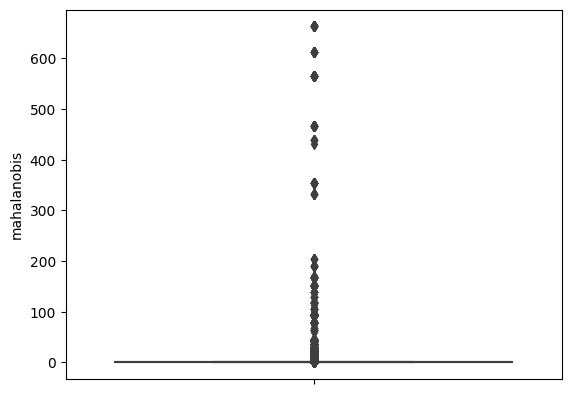

In [90]:
sns.boxplot(y=df_corr.mahalanobis)

## ● Explicar caracteristicas de los datos atipicos detectados

Datos que datos claramente atipicos son reservas:


*   Solo niños con bebes
*   Solo bebes
*   Sin ningun participante
*   Sin dias tanto en fines de semana como dias de semana
*   De grupos grandes
*   De grupos con mas de 8 niños
*   Average daily rate en cero
*   Average daily rate es negativo
*   Days in waiting list de mas de un año





## ● Decision del tratamiento a aplicar 

Podemos eliminar las filas que no tengan adultos ninios o bebes tanto como las filas que solo tengan bebes en las reservas ya que son un porcentaje inferior a x del dataset

# Conclusion

Si una persona es un outlier en previous_cancellations y en days_in_waiting_list probablemente cancele



In [91]:
df.agg(['min','max']) #vemos que adr da negativo no se quedo en fin de semana ni en dia de semana pero NO se cancelo

,arrival_date,hotel,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,deposit_type,agent,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,id,is_canceled
min,2015-07-01,City Hotel,0,0,0,0,0.0,0,BB,AUT,...,No Deposit,0.0,0,Contract,-6.38,0,0,Canceled,0000aab4-4a77-4d46-96ce-cf4d287f86fd,0
max,2017-08-31,Resort Hotel,629,16,40,55,10.0,9,SC,USA,...,Refundable,535.0,391,Transient-Party,510.00,8,5,No-Show,ffff7b1f-6842-4773-be10-1b9009045ad8,1


In [92]:
#encontramos una fila con dato outlier, adr = -6.38
df_adr_menor_a_cero = df.loc[df['average_daily_rate'] < 0]
df_adr_menor_a_cero

,arrival_date,hotel,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,deposit_type,agent,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,id,is_canceled
21124,2017-03-05,Resort Hotel,195,4,6,2,0.0,0,BB,GBR,...,No Deposit,273.0,0,Transient-Party,-6.38,0,0,Check-Out,869f627f-35fb-42b0-8376-12869739d76e,0


In [93]:
#eliminamos el outlier porque una fila respecto a la gran cantidad de datos que tenemos no es relevante
df.drop(df[df['average_daily_rate']<0].index, axis='index',inplace=True)

In [94]:
cantidad_de_adr_en_0 = df[df['average_daily_rate']==0].shape[0]
porcentaje_de_adr_en_0 = cantidad_de_adr_en_0 *100/ df_original.shape[0]
porcentaje_de_adr_en_0 

1.4278099914396007

In [95]:
df.drop(df[df['average_daily_rate']==0].index, axis='index',inplace=True)

In [96]:
#bebes sin adultos es una sola fila
df[(df['babies']!=0) & (df['adults']==0)]

,arrival_date,hotel,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,deposit_type,agent,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,id,is_canceled
41018,2015-12-09,City Hotel,22,1,4,0,2.0,1,BB,PRT,...,No Deposit,14.0,0,Transient,80.75,0,1,No-Show,66690d14-4436-42a1-9297-bc34d36e48eb,1


In [97]:
df.drop(df[(df['babies']!=0) & (df['adults']==0)].index, axis='index',inplace=True)

In [98]:
#ningun participante
sin_ningun_participante = df[(df['babies']==0) & (df['adults']==0) & (df['children']==0)].shape[0]
porcentaje_sin_ningun_participante = sin_ningun_participante *100 / df_original.shape[0]
porcentaje_sin_ningun_participante

0.020997205756464715

In [99]:
df.drop(df[(df['babies']==0) & (df['adults']==0) & (df['children']==0)].index, axis='index',inplace=True)

In [100]:
#% sin dias
sin_dias.shape[0] * 100 / (df_original.shape[0])

0.4797053930515401

In [101]:
df.drop(df[(df['stays_in_weekend_nights']==0) &(df['stays_in_week_nights'] ==0)].index, axis='index',inplace=True)

In [102]:
outlier_adultos = df_original[(df_original['adults']>= 10)]
outlier_adultos

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,id,is_canceled
4064,Resort Hotel,304,2015,September,36,3,0,3,40,0.0,...,NaN,0,Group,0.0,0,0,Canceled,2015-01-02,ebb06f2f-1c79-490c-ae9f-8f7ba838d328,1
11830,Resort Hotel,334,2015,October,42,12,2,5,20,0.0,...,NaN,0,Group,0.0,0,0,Canceled,2015-01-02,b169d836-a93c-43a3-8bb4-9ec2afa66483,1
19146,Resort Hotel,354,2015,September,39,26,2,5,26,0.0,...,NaN,0,Group,0.0,0,0,Canceled,2015-01-02,edcaa4e3-8b46-4812-9d09-672cd8b73589,1
35477,Resort Hotel,334,2015,October,42,12,2,5,10,0.0,...,NaN,0,Group,0.0,0,0,Canceled,2015-01-02,a2928fc5-26a1-4e9c-9be9-1d89f03dccf5,1
38305,Resort Hotel,340,2015,September,37,12,2,5,26,0.0,...,NaN,0,Group,0.0,0,0,Canceled,2015-01-02,f386dc39-94e7-4b56-9609-d12d80d9a6a8,1
55112,Resort Hotel,349,2015,September,39,21,1,3,27,0.0,...,NaN,0,Group,0.0,0,0,Canceled,2015-01-02,6ed0d330-fea1-4b4e-b9e8-cbdcdc514d7c,1
59059,Resort Hotel,333,2015,September,36,5,2,5,26,0.0,...,NaN,0,Group,0.0,0,0,Canceled,2015-01-02,62e325e1-4d46-4794-8d32-100a756074db,1
59165,Resort Hotel,338,2015,October,41,4,2,0,55,0.0,...,NaN,0,Group,0.0,0,0,Canceled,2015-01-02,9bf89c35-d6aa-4dfb-a0cb-2a3eb30bafd2,1


In [103]:
#pd.crosstab(df['is_canceled'],df['distribution_channel'])
#pd.crosstab(df['is_canceled'],df['meal'])
pd.crosstab(df['is_canceled'],df['deposit_type'])

deposit_type,No Deposit,Non Refund,Refundable
is_canceled,,,
0,30143,37,50
1,20643,10113,28


In [104]:
pd.crosstab(df['is_canceled'],df['deposit_type'])

deposit_type,No Deposit,Non Refund,Refundable
is_canceled,,,
0,30143,37,50
1,20643,10113,28


In [105]:
pd.crosstab(df_original['is_canceled'],df_original['arrival_date_month'])


arrival_date_month,April,August,December,February,January,July,June,March,May,November,October,September
is_canceled,,,,,,,,,,,,
0,2751,3564,1806,2228,1735,3185,2603,2680,2895,1921,2894,2710
1,3127,3612,1687,1897,1266,3339,3169,2219,3264,1483,2969,2909


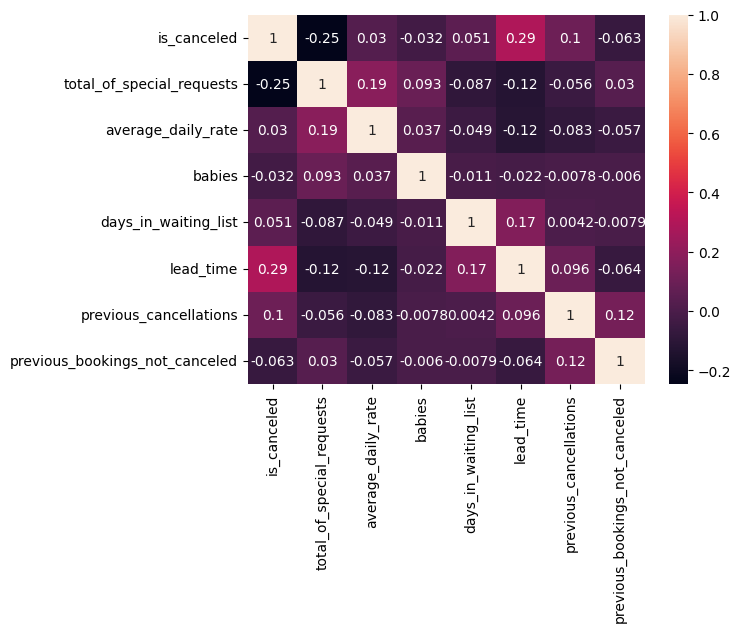

In [106]:
df_booking_changes = df[['is_canceled', 'total_of_special_requests','average_daily_rate','babies', 'days_in_waiting_list','lead_time', 'previous_cancellations', 'previous_bookings_not_canceled']] #d'f filtrado

matriz_correlacion = df_booking_changes.corr()
sns.heatmap(matriz_correlacion, annot = True) 
plt.show()  #vemos que lead_time tiene mayor relacion con la cancelacion

In [107]:
df_booking_changes

,is_canceled,total_of_special_requests,average_daily_rate,babies,days_in_waiting_list,lead_time,previous_cancellations,previous_bookings_not_canceled
0,1,1,115.50,0,0,49,0,0
1,0,0,42.00,0,0,4,0,0
2,0,2,229.00,0,0,25,0,0
3,1,0,75.00,0,0,26,0,0
4,0,1,75.00,0,0,104,0,0
...,...,...,...,...,...,...,...,...
61908,1,1,48.00,0,0,24,0,0
61909,0,0,149.00,0,0,0,0,0
61910,0,0,95.00,0,0,10,0,0
61911,1,0,36.05,0,0,143,0,0


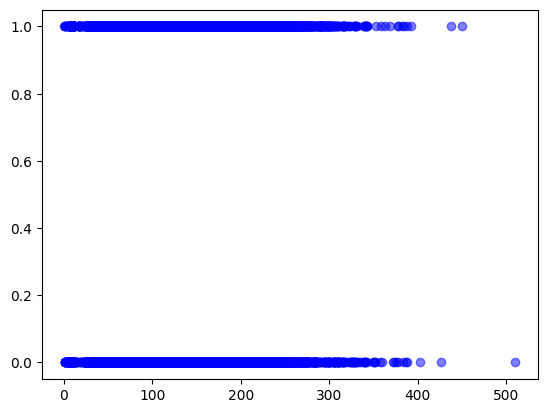

In [108]:
plt.scatter(df['average_daily_rate'],df['is_canceled'],color='blue',alpha=0.5)
#posibles 4 puntos outliers


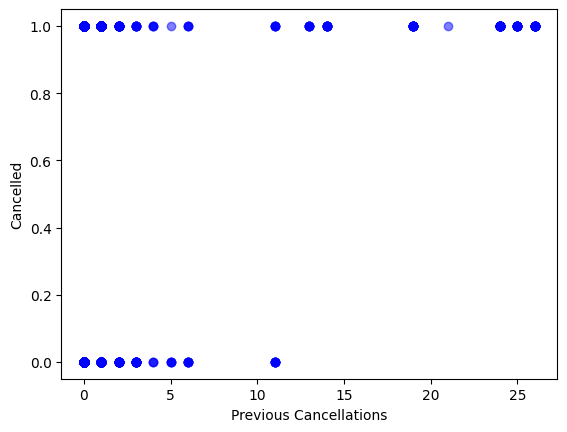

In [109]:
plt.scatter(df['previous_cancellations'],df['is_canceled'],color='blue',alpha=0.5)
#superando las 10 cancelaciones previas es MUY probable que cancelen
plt.ylabel('Cancelled') 
plt.xlabel('Previous Cancellations') 
plt.show()


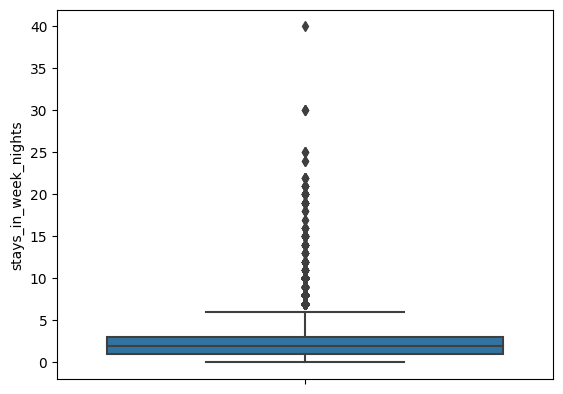

In [110]:
sns.boxplot(y=df.stays_in_week_nights)
plt.show()

In [111]:
df_atipico = df[df['stays_in_week_nights'] >= 5]
pd.crosstab(df_atipico['is_canceled'],df_atipico['stays_in_week_nights'])


stays_in_week_nights,5,6,7,8,9,10,11,12,13,14,...,17,18,19,20,21,22,24,25,30,40
is_canceled,,,,,,,,,,,,,,,,,,,,,
0,2904,386,295,185,54,306,6,9,6,2,...,0,0,6,8,0,0,0,3,2,0
1,2732,405,229,156,67,200,20,19,5,21,...,2,3,17,12,9,6,2,0,1,1


In [112]:
df_atipico = df[df['stays_in_week_nights'] <= 5]
pd.crosstab(df_atipico['is_canceled'],df_atipico['stays_in_week_nights'])


stays_in_week_nights,0,1,2,3,4,5
is_canceled,,,,,,
0,2019,8322,7573,5615,2514,2904
1,1322,6835,10320,5925,2433,2732


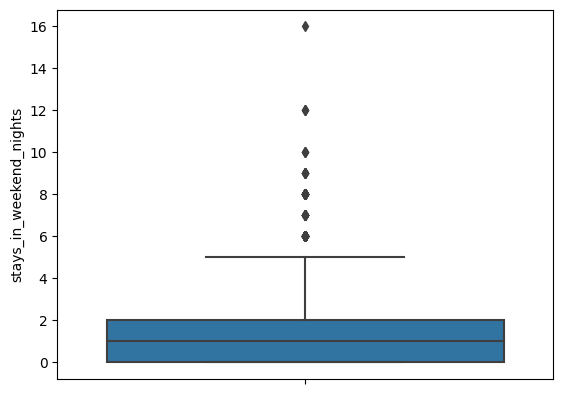

In [113]:
sns.boxplot(y=df.stays_in_weekend_nights)
plt.show()

In [114]:
df_atipico = df[df['stays_in_weekend_nights'] >= 5]
pd.crosstab(df_atipico['is_canceled'],df_atipico['stays_in_weekend_nights'])


stays_in_weekend_nights,5,6,7,8,9,10,12,16
is_canceled,,,,,,,,
0,14,23,1,8,1,2,2,0
1,28,59,12,26,5,1,1,1


In [115]:
df_atipico = df[df['stays_in_weekend_nights'] <= 5]
pd.crosstab(df_atipico['is_canceled'],df_atipico['stays_in_weekend_nights'])


stays_in_weekend_nights,0,1,2,3,4,5
is_canceled,,,,,,
0,12872,7993,8480,315,519,14
1,13509,7729,8691,313,409,28


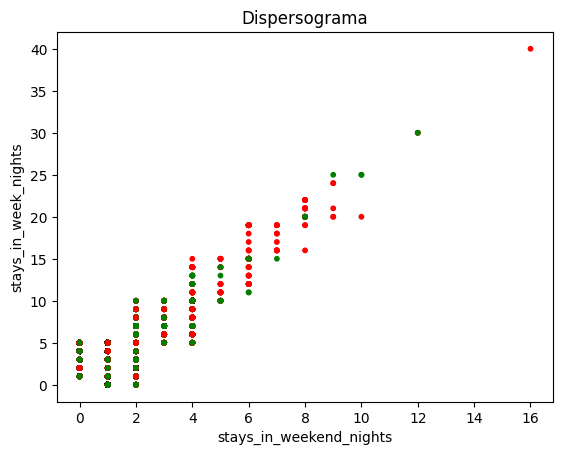

In [116]:
col = df.is_canceled.map({0:'g', 1:'r'})
grf=df.plot.scatter(x="stays_in_weekend_nights", y="stays_in_week_nights", c=col, s=10).set(title="Dispersograma",xlabel='stays_in_weekend_nights',ylabel='stays_in_week_nights') 